In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"abhisheksharma2412","key":"cc9995a40100d48ec2582ed8e7e02a8d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI (if not already)
!pip install -q kaggle


In [ ]:
# Download the dataset ZIP
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store


Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
 99% 4.26G/4.29G [01:09<00:01, 27.1MB/s]
100% 4.29G/4.29G [01:09<00:00, 66.5MB/s]


In [ ]:
# Unzip downloaded file
!unzip ecommerce-behavior-data-from-multi-category-store.zip -d ecommerce_data


Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: ecommerce_data/2019-Nov.csv  y

  inflating: ecommerce_data/2019-Oct.csv  y



In [ ]:
# Only extract 2019-Oct.csv to ecommerce_data/
!unzip -j ecommerce-behavior-data-from-multi-category-store.zip "2019-Oct.csv" -d ecommerce_data


Archive:  ecommerce-behavior-data-from-multi-category-store.zip
replace ecommerce_data/2019-Oct.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ecommerce_data/2019-Oct.csv  y



In [ ]:
import os

# Remove November file if it was extracted earlier
try:
    os.remove("ecommerce_data/2019-Nov.csv")
    print("✅ November file removed.")
except FileNotFoundError:
    print("✅ November file was never extracted.")


✅ November file removed.


In [ ]:
import os
import pandas as pd
import numpy as np

# List files in folder to confirm
files = os.listdir("ecommerce_data")
print("Available files:", files)

# Drop November — don't load it at all
if "2019-Nov.csv" in files:
    print("⚠️ Skipping November. Only using October for now.")

# Sampling configuration
total_oct_rows = 42448764  # Total number of rows in Oct
sample_target = 1_000_000  # Number of rows you want
sample_frac = sample_target / total_oct_rows

# Load sampled data from October
print(f"\n📥 Sampling ~{sample_target:,} rows (~{sample_frac:.2%}) from October...")
oct_sample_df = pd.read_csv(
    "ecommerce_data/2019-Oct.csv",
    skiprows=lambda i: i > 0 and np.random.rand() > sample_frac
)

# Preview
print("\n✅ Sample loaded successfully!")
print("Sample shape:", oct_sample_df.shape)
oct_sample_df.head()


Available files: ['2019-Oct.csv']

📥 Sampling ~1,000,000 rows (~2.36%) from October...

✅ Sample loaded successfully!
Sample shape: (999032, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:01:09 UTC,view,15100337,2053013557024391671,NaN,NaN,257.15,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
1,2019-10-01 00:01:33 UTC,view,1480734,2053013561092866779,computers.desktop,pulser,983.27,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
2,2019-10-01 00:03:32 UTC,view,6200547,2053013552293216471,appliances.environment.air_heater,oasis,49.81,554193409,f41989d7-6f56-43a3-b066-f3cb1a632edf
3,2019-10-01 00:03:34 UTC,view,6700940,2053013554247762257,computers.components.videocards,gigabyte,437.33,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
4,2019-10-01 00:05:38 UTC,view,10800048,2053013554994348409,NaN,redmond,66.29,539194858,5fe9d0a0-0de6-47de-a55a-eae9f89475cd


In [ ]:
# Save sample for future work
oct_sample_df.to_csv("ecommerce_oct_sample.csv", index=False)
print("Sample saved as ecommerce_oct_sample.csv")


Sample saved as ecommerce_oct_sample.csv


In [ ]:
# Unique event types and their counts
event_counts = oct_sample_df['event_type'].value_counts()
print("Event Types:\n", event_counts)


Event Types:
 event_type
view        959891
cart         21670
purchase     17471
Name: count, dtype: int64


In [ ]:
# Count top 10 most frequent categories
category_counts = oct_sample_df['category_code'].value_counts().head(10)
print("Top Categories:\n", category_counts)

# How many are missing?
missing_cats = oct_sample_df['category_code'].isnull().sum()
print(f"\nMissing category_code values: {missing_cats}")


Top Categories:
 category_code
electronics.smartphone              271275
electronics.clocks                   30868
computers.notebook                   27085
electronics.video.tv                 26101
electronics.audio.headphone          25917
appliances.kitchen.refrigerators     20965
appliances.kitchen.washer            20331
appliances.environment.vacuum        18771
apparel.shoes                        18170
auto.accessories.player              10850
Name: count, dtype: int64

Missing category_code values: 317270


In [ ]:
# Top brands
brand_counts = oct_sample_df['brand'].value_counts().head(10)
print("Top Brands:\n", brand_counts)

# Missing brands
missing_brands = oct_sample_df['brand'].isnull().sum()
print(f"\nMissing brand values: {missing_brands}")


Top Brands:
 brand
samsung    124328
apple       97011
xiaomi      72325
huawei      26339
lucente     15359
bosch       13202
lg          13106
oppo        11508
sony        10709
acer        10254
Name: count, dtype: int64

Missing brand values: 143842


Price Summary:
 count    999032.000000
mean        290.096491
std         358.026174
min           0.000000
25%          66.150000
50%         162.170000
75%         358.570000
max        2574.070000
Name: price, dtype: float64


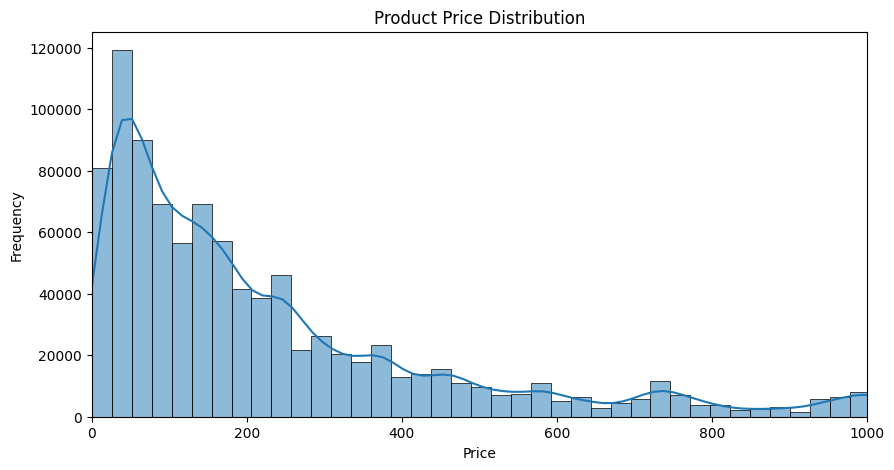

In [ ]:
# Summary stats
print("Price Summary:\n", oct_sample_df['price'].describe())

# Plot price distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(oct_sample_df['price'], bins=100, kde=True)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 1000)  # Limit for clarity
plt.show()


In [ ]:
# Convert event_time to datetime format
oct_sample_df['event_time'] = pd.to_datetime(oct_sample_df['event_time'])


In [ ]:
# Sort by timestamp (optional but good practice for session flow)
oct_sample_df = oct_sample_df.sort_values(by='event_time').reset_index(drop=True)


In [ ]:
# Extract time-based features
oct_sample_df['event_hour'] = oct_sample_df['event_time'].dt.hour
oct_sample_df['event_day'] = oct_sample_df['event_time'].dt.day
oct_sample_df['event_weekday'] = oct_sample_df['event_time'].dt.weekday  # 0 = Monday
oct_sample_df['event_month'] = oct_sample_df['event_time'].dt.month
oct_sample_df['event_date'] = oct_sample_df['event_time'].dt.date


In [ ]:
# Preview new time-based columns
oct_sample_df[['event_time', 'event_hour', 'event_weekday', 'event_day', 'event_month']].head()


,event_time,event_hour,event_weekday,event_day,event_month
0,2019-10-01 00:01:09+00:00,0,1,1,10
1,2019-10-01 00:01:33+00:00,0,1,1,10
2,2019-10-01 00:03:32+00:00,0,1,1,10
3,2019-10-01 00:03:34+00:00,0,1,1,10
4,2019-10-01 00:05:38+00:00,0,1,1,10


In [ ]:
# Total unique users at each funnel stage
view_users = oct_sample_df[oct_sample_df['event_type'] == 'view']['user_id'].nunique()
cart_users = oct_sample_df[oct_sample_df['event_type'] == 'cart']['user_id'].nunique()
purchase_users = oct_sample_df[oct_sample_df['event_type'] == 'purchase']['user_id'].nunique()

print("Funnel Conversion")
print(f"Unique Viewers       : {view_users:,}")
print(f"Added to Cart        : {cart_users:,}")
print(f"Purchasers           : {purchase_users:,}")

# Calculate conversion rates
view_to_cart = (cart_users / view_users) * 100
cart_to_purchase = (purchase_users / cart_users) * 100
view_to_purchase = (purchase_users / view_users) * 100

print("\nConversion Rates:")
print(f"View → Cart            : {view_to_cart:.2f}%")
print(f"Cart → Purchase        : {cart_to_purchase:.2f}%")
print(f"View → Purchase (total): {view_to_purchase:.2f}%")


Funnel Conversion
Unique Viewers       : 586,191
Added to Cart        : 20,095
Purchasers           : 16,352

Conversion Rates:
View → Cart            : 3.43%
Cart → Purchase        : 81.37%
View → Purchase (total): 2.79%


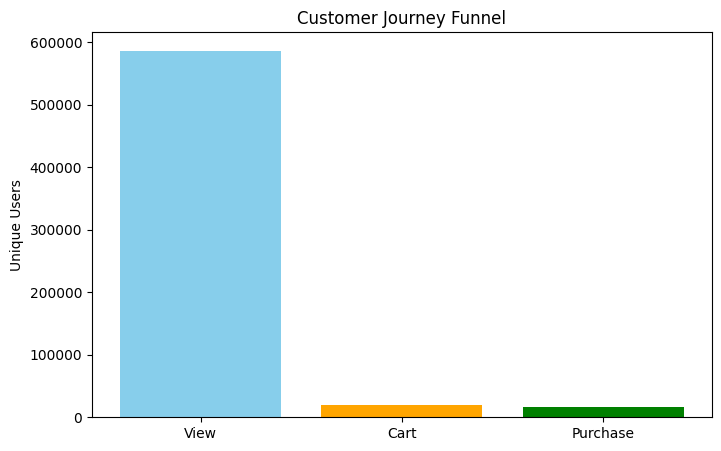

In [ ]:
import matplotlib.pyplot as plt

funnel_counts = [view_users, cart_users, purchase_users]
labels = ['View', 'Cart', 'Purchase']

plt.figure(figsize=(8,5))
plt.bar(labels, funnel_counts, color=['skyblue', 'orange', 'green'])
plt.title('Customer Journey Funnel')
plt.ylabel('Unique Users')
plt.show()


In [ ]:
# Fill missing category_code first (optional)
oct_sample_df['category_code'] = oct_sample_df['category_code'].fillna('unknown')

# Split at first period
oct_sample_df['main_category'] = oct_sample_df['category_code'].apply(lambda x: x.split('.')[0])
oct_sample_df['sub_category'] = oct_sample_df['category_code'].apply(lambda x: '.'.join(x.split('.')[1:]) if '.' in x else 'general')

# Preview
oct_sample_df[['category_code', 'main_category', 'sub_category']].head(10)


,category_code,main_category,sub_category
0,unknown,unknown,general
1,computers.desktop,computers,desktop
2,appliances.environment.air_heater,appliances,environment.air_heater
3,computers.components.videocards,computers,components.videocards
4,unknown,unknown,general
5,electronics.audio.headphone,electronics,audio.headphone
6,electronics.smartphone,electronics,smartphone
7,apparel.shoes.keds,apparel,shoes.keds
8,unknown,unknown,general
9,unknown,unknown,general


In [ ]:
print("Top Main Categories:\n", oct_sample_df['main_category'].value_counts().head(10))
print("\nTop Sub Categories:\n", oct_sample_df['sub_category'].value_counts().head(10))


Top Main Categories:
 main_category
electronics     380080
unknown         317270
appliances      117106
computers        54931
apparel          36434
furniture        29532
auto             23499
construction     17097
kids             12312
accessories       5707
Name: count, dtype: int64

Top Sub Categories:
 sub_category
general                  317270
smartphone               271275
clocks                    30868
notebook                  27085
video.tv                  26101
audio.headphone           25917
kitchen.refrigerators     20965
kitchen.washer            20331
environment.vacuum        18771
shoes                     18170
Name: count, dtype: int64


In [ ]:
# Filter only relevant columns
funnel_df = oct_sample_df[['user_id', 'event_type', 'main_category']].dropna()

# Create pivot table: counts of unique users by event_type & main_category
funnel = funnel_df.groupby(['main_category', 'event_type'])['user_id'].nunique().unstack(fill_value=0)

# Add total views, carts, purchases
funnel['view_to_cart_%'] = (funnel['cart'] / funnel['view']) * 100
funnel['cart_to_purchase_%'] = (funnel['purchase'] / funnel['cart']) * 100
funnel['view_to_purchase_%'] = (funnel['purchase'] / funnel['view']) * 100

# Sort by most viewed categories
funnel = funnel.sort_values(by='view', ascending=False)

# Round for readability
funnel = funnel.round(2)

funnel.reset_index(inplace=True)
funnel.head(10)


event_type,main_category,cart,purchase,view,view_to_cart_%,cart_to_purchase_%,view_to_purchase_%
0,electronics,14599,9178,252233,5.79,62.87,3.64
1,unknown,2355,4002,218811,1.08,169.94,1.83
2,appliances,2077,1786,81717,2.54,85.99,2.19
3,computers,587,625,35760,1.64,106.47,1.75
4,apparel,1,184,27943,0.00,18400.00,0.66
5,furniture,59,194,22756,0.26,328.81,0.85
6,auto,201,242,18197,1.10,120.40,1.33
7,construction,243,163,12268,1.98,67.08,1.33
8,kids,54,139,9545,0.57,257.41,1.46
9,accessories,8,35,4485,0.18,437.50,0.78


/tmp/ipython-input-29-1455548545.py:31: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


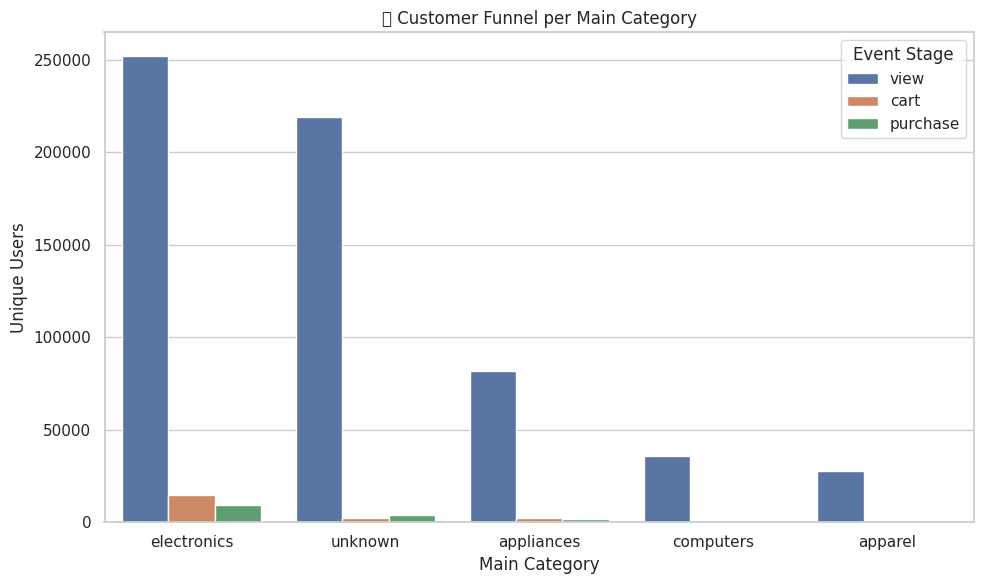

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Use only top 5 most viewed categories
top5 = funnel.head(5).copy()

# Melt the funnel for stacked barplot
funnel_melted = top5.melt(
    id_vars='main_category',
    value_vars=['view', 'cart', 'purchase'],
    var_name='event_type',
    value_name='unique_users'
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=funnel_melted,
    x='main_category',
    y='unique_users',
    hue='event_type'
)

plt.title("🔁 Customer Funnel per Main Category")
plt.ylabel("Unique Users")
plt.xlabel("Main Category")
plt.legend(title="Event Stage")
plt.tight_layout()
plt.show()


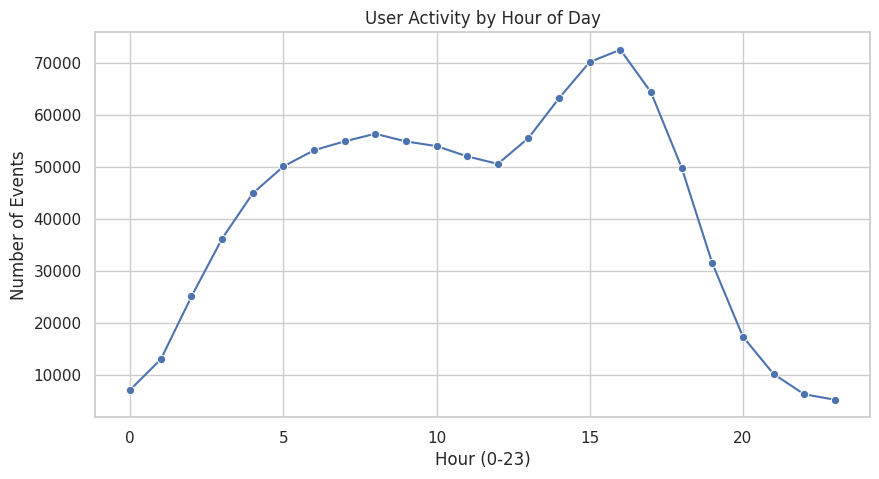

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count events per hour
hourly_counts = oct_sample_df.groupby('event_hour')['event_type'].count()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title("User Activity by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


In [ ]:
# Group by user: how many events each user triggered
user_activity = oct_sample_df.groupby('user_id')['event_type'].value_counts().unstack(fill_value=0).reset_index()

# Fill in missing columns if any event type is absent
for col in ['view', 'cart', 'purchase']:
    if col not in user_activity.columns:
        user_activity[col] = 0

# Add total events and derived ratios
user_activity['total_events'] = user_activity[['view', 'cart', 'purchase']].sum(axis=1)
user_activity['cart_rate'] = user_activity['cart'] / (user_activity['view'] + 1)  # +1 to avoid division by zero
user_activity['purchase_rate'] = user_activity['purchase'] / (user_activity['view'] + 1)

user_activity.head()


event_type,user_id,cart,purchase,view,total_events,cart_rate,purchase_rate
0,210507313,0,0,1,1,0.0,0.0
1,216064734,0,0,1,1,0.0,0.0
2,221480173,0,0,1,1,0.0,0.0
3,239876607,0,0,1,1,0.0,0.0
4,240522111,0,0,1,1,0.0,0.0


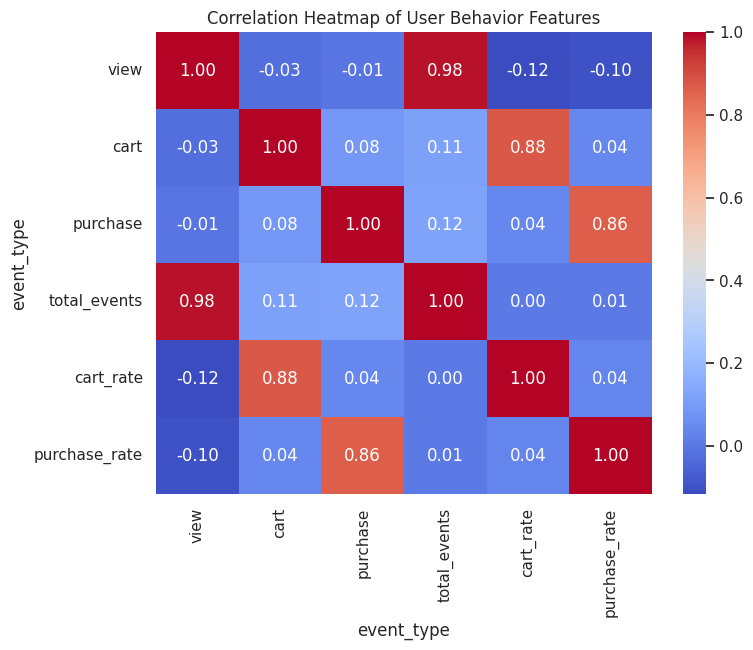

In [ ]:
# Select numeric features only
corr_df = user_activity[['view', 'cart', 'purchase', 'total_events', 'cart_rate', 'purchase_rate']]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of User Behavior Features")
plt.show()


In [ ]:
# Check % missing
missing_summary = (oct_sample_df.isnull().mean() * 100).round(2).sort_values(ascending=False)
print("Missing Value % by Column:\n", missing_summary)


Missing Value % by Column:
 brand            14.4
event_time        0.0
product_id        0.0
event_type        0.0
category_id       0.0
category_code     0.0
price             0.0
user_id           0.0
user_session      0.0
event_hour        0.0
event_day         0.0
event_weekday     0.0
event_month       0.0
event_date        0.0
main_category     0.0
sub_category      0.0
dtype: float64


In [ ]:
oct_sample_df['brand'] = oct_sample_df['brand'].fillna('unknown')
df = oct_sample_df.copy()


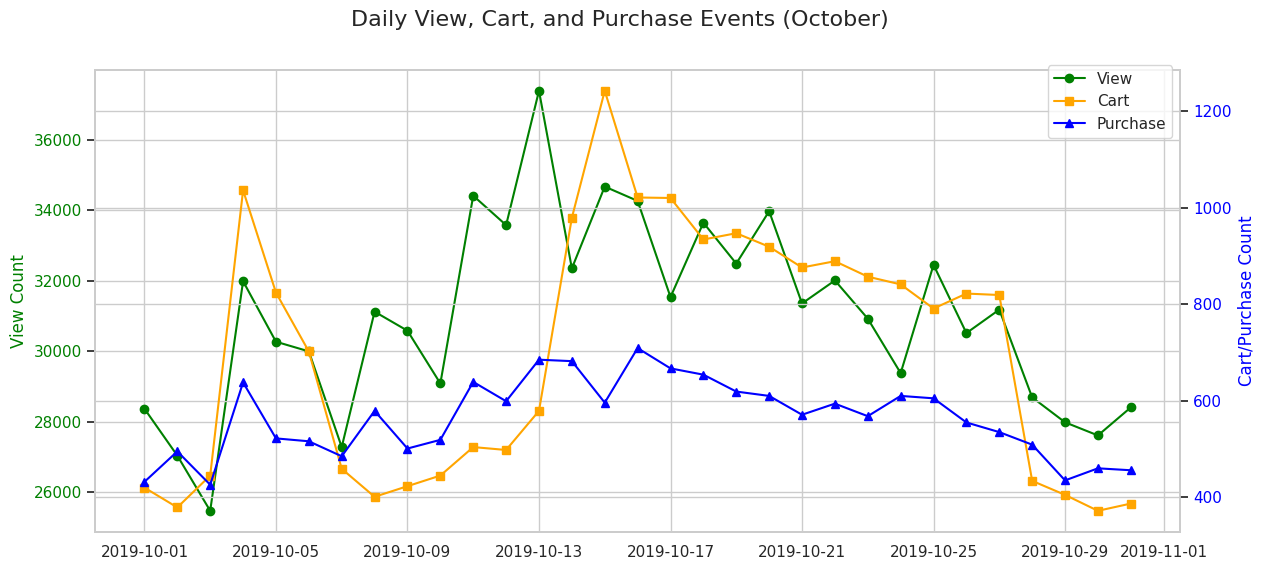

In [ ]:
# Ensure your timestamp column is in datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

# Create a new column for just the date
df['event_date'] = df['event_time'].dt.date

# Count events per day by type
daily_events = df.groupby(['event_date', 'event_type'])['user_id'].count().unstack().fillna(0)
daily_events.head()
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis: View count
ax1.plot(daily_events.index, daily_events['view'], color='green', label='View', marker='o')
ax1.set_ylabel('View Count', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Right Y-axis: Purchase and Cart counts
ax2 = ax1.twinx()
ax2.plot(daily_events.index, daily_events['cart'], color='orange', label='Cart', marker='s')
ax2.plot(daily_events.index, daily_events['purchase'], color='blue', label='Purchase', marker='^')
ax2.set_ylabel('Cart/Purchase Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legend
fig.suptitle("Daily View, Cart, and Purchase Events (October)", fontsize=16)
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
plt.grid(True)
plt.show()



/tmp/ipython-input-36-4253458030.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


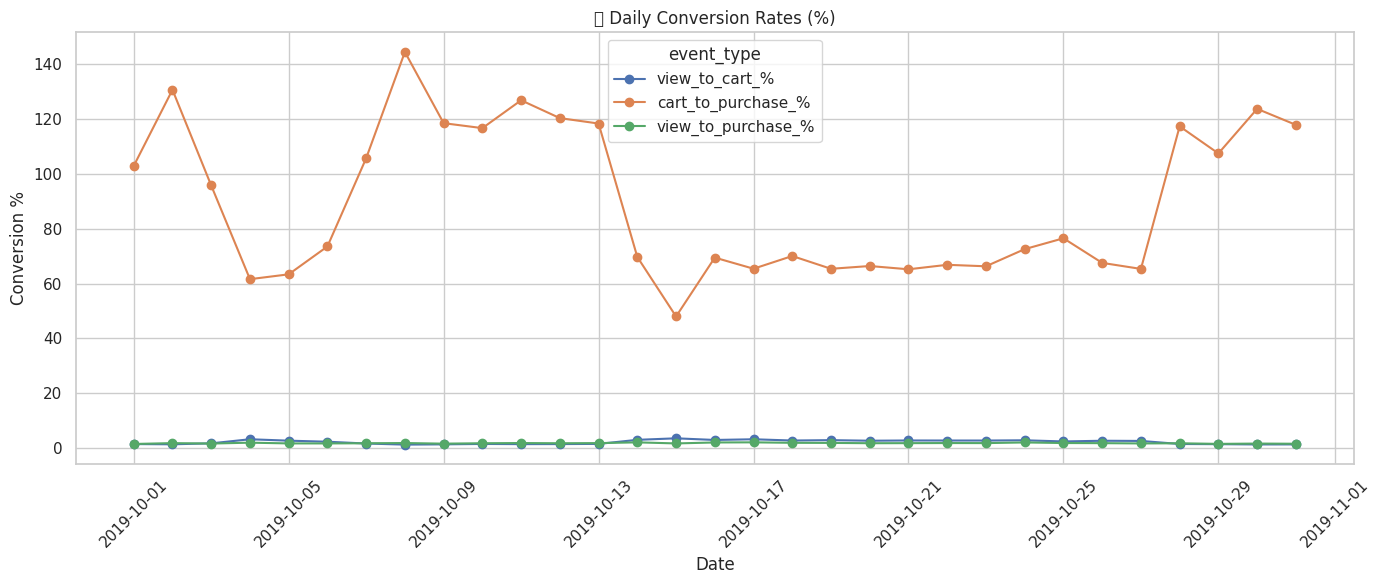

In [ ]:
# Calculate daily conversion rates
daily_events['view_to_cart_%'] = (daily_events['cart'] / daily_events['view']) * 100
daily_events['cart_to_purchase_%'] = (daily_events['purchase'] / daily_events['cart']) * 100
daily_events['view_to_purchase_%'] = (daily_events['purchase'] / daily_events['view']) * 100

# Plot conversion rates
daily_events[['view_to_cart_%', 'cart_to_purchase_%', 'view_to_purchase_%']].plot(
    figsize=(14, 6), marker='o'
)
plt.title("📈 Daily Conversion Rates (%)")
plt.xlabel("Date")
plt.ylabel("Conversion %")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-37-633828485.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(daily_events.index, rotation=45)
/tmp/ipython-input-37-633828485.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


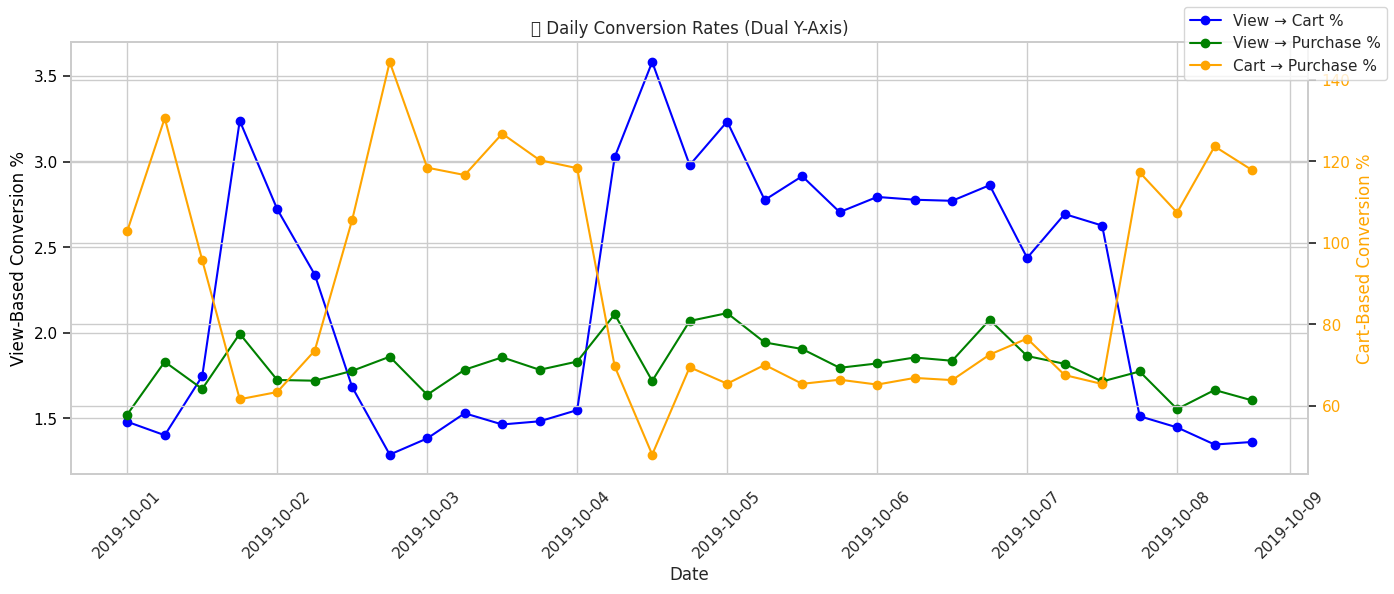

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis: View-to-Cart and View-to-Purchase
ax1.plot(daily_events.index, daily_events['view_to_cart_%'], color='blue', label='View → Cart %', marker='o')
ax1.plot(daily_events.index, daily_events['view_to_purchase_%'], color='green', label='View → Purchase %', marker='o')
ax1.set_ylabel('View-Based Conversion %', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Date')
ax1.set_xticklabels(daily_events.index, rotation=45)

# Right Y-axis: Cart-to-Purchase %
ax2 = ax1.twinx()
ax2.plot(daily_events.index, daily_events['cart_to_purchase_%'], color='orange', label='Cart → Purchase %', marker='o')
ax2.set_ylabel('Cart-Based Conversion %', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title & Grid
plt.title("📈 Daily Conversion Rates (Dual Y-Axis)")
fig.tight_layout()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.grid(True)
plt.show()


/tmp/ipython-input-38-482160897.py:34: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


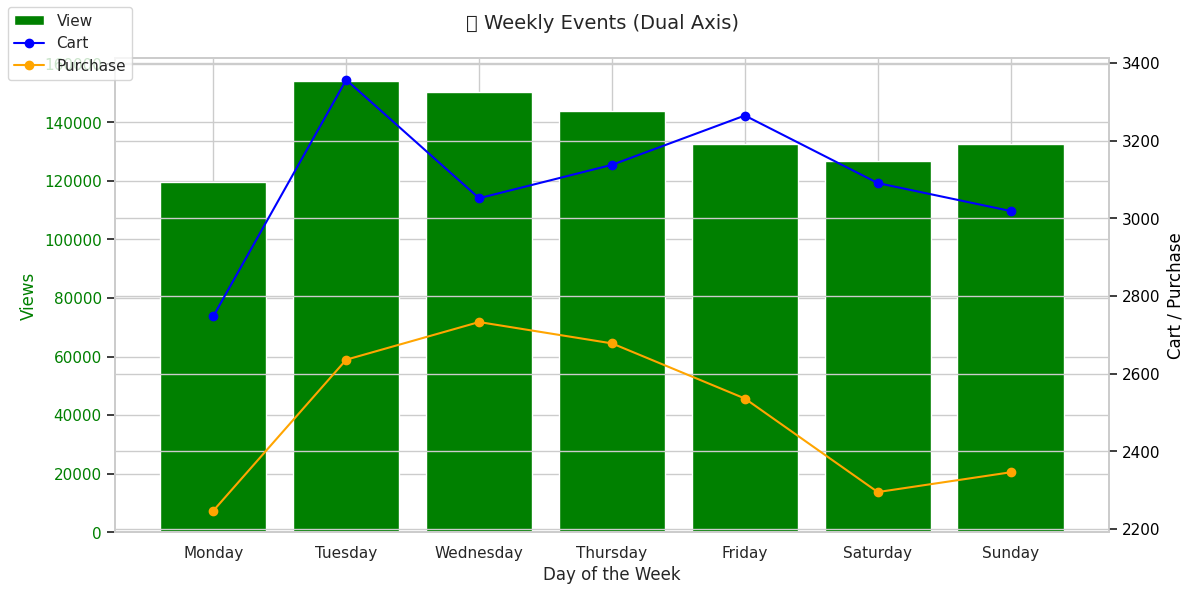

In [ ]:
# Ensure event_time is datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Extract weekday (0 = Monday, 6 = Sunday)
df['event_weekday'] = df['event_time'].dt.day_name()

# Count events per weekday by type
weekday_events = df.groupby(['event_weekday', 'event_type'])['user_id'].count().unstack().fillna(0)

# Optional: reorder the days for correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_events = weekday_events.reindex(weekday_order)
weekday_events.head()

# Dual y-axis plot for weekly breakdown
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Views
ax1.bar(weekday_events.index, weekday_events['view'], color='green', label='View')
ax1.set_ylabel("Views", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel("Day of the Week")

# Right Y-axis: Carts & Purchases
ax2 = ax1.twinx()
ax2.plot(weekday_events.index, weekday_events['cart'], color='blue', marker='o', label='Cart')
ax2.plot(weekday_events.index, weekday_events['purchase'], color='orange', marker='o', label='Purchase')
ax2.set_ylabel("Cart / Purchase", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title & legend
fig.suptitle("🗓️ Weekly Events (Dual Axis)", fontsize=14)
fig.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate conversion rates safely
weekday_events['view_to_cart_%'] = (weekday_events['cart'] / weekday_events['view']) * 100
weekday_events['cart_to_purchase_%'] = (weekday_events['purchase'] / weekday_events['cart']) * 100
weekday_events['view_to_purchase_%'] = (weekday_events['purchase'] / weekday_events['view']) * 100


/tmp/ipython-input-40-2632528822.py:20: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


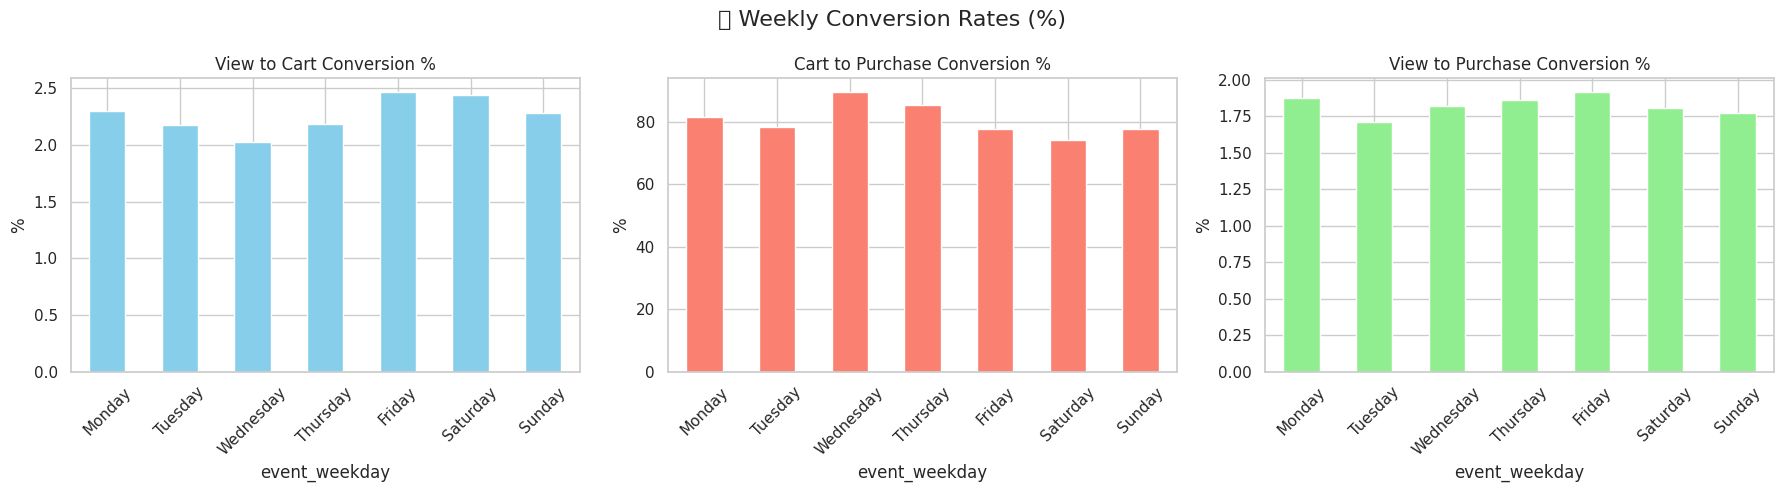

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

weekday_events['view_to_cart_%'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title("View to Cart Conversion %")
axs[0].set_ylabel("%")

weekday_events['cart_to_purchase_%'].plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title("Cart to Purchase Conversion %")
axs[1].set_ylabel("%")

weekday_events['view_to_purchase_%'].plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title("View to Purchase Conversion %")
axs[2].set_ylabel("%")

for ax in axs:
    ax.set_xticks(range(len(weekday_events.index)))
    ax.set_xticklabels(weekday_events.index, rotation=45)

plt.suptitle("🧠 Weekly Conversion Rates (%)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Filter purchases and group by user_id
repeat_customers = df[df['event_type'] == 'purchase'] \
    .groupby('user_id') \
    .size() \
    .reset_index(name='purchase_count')

# Filter customers who purchased more than once
repeat_customers = repeat_customers[repeat_customers['purchase_count'] > 1]
print(f"Number of repeat customers: {len(repeat_customers)}")

# Preview
repeat_customers.head()


Number of repeat customers: 872


,user_id,purchase_count
4,489085769,2
23,512368363,2
28,512371555,2
49,512382879,2
56,512384438,2


In [ ]:
# Filter only purchase events
purchase_df = df[df['event_type'] == 'purchase']

# Calculate total spending per user
customer_spending = purchase_df.groupby('user_id')['price'].sum().reset_index()
customer_spending.columns = ['user_id', 'total_spent']

# Identify top 10% spenders
threshold = customer_spending['total_spent'].quantile(0.90)
top_10_percent_customers = customer_spending[customer_spending['total_spent'] >= threshold]

# Display top 10 most valuable customers
top_10_percent_customers.sort_values(by='total_spent', ascending=False).head()


,user_id,total_spent
3159,515384420,8915.26
1115,513117637,8770.50
5173,519267944,6591.41
7527,530834332,5546.56
12140,553431815,5511.81


In [ ]:
df_original = df.copy()


In [ ]:
df_original['category_code'] = df_original['category_code'].fillna('unknown')
df_original[['category_main', 'category_sub']] = df_original['category_code'].str.split(pat='.', n=1, expand=True)
df_original[['category_main', 'category_sub']].head()


,category_main,category_sub
0,unknown,None
1,computers,desktop
2,appliances,environment.air_heater
3,computers,components.videocards
4,unknown,None


In [ ]:
print(df_original.describe())
print("\nMissing values:\n", df_original.isnull().mean().sort_values(ascending=False) * 100)


         product_id   category_id          price       user_id     event_hour  \
count  9.990320e+05  9.990320e+05  999032.000000  9.990320e+05  999032.000000   
mean   1.054697e+07  2.057399e+18     290.096491  5.335362e+08      11.215039   
std    1.188667e+07  1.841129e+16     358.026174  1.853218e+07       5.294446   
min    1.000978e+06  2.053014e+18       0.000000  2.105073e+08       0.000000   
25%    1.005157e+06  2.053014e+18      66.150000  5.159062e+08       7.000000   
50%    5.000344e+06  2.053014e+18     162.170000  5.296948e+08      11.000000   
75%    1.600034e+07  2.053014e+18     358.570000  5.516174e+08      16.000000   
max    6.050001e+07  2.175420e+18    2574.070000  5.662808e+08      23.000000   

           event_day  event_month  
count  999032.000000     999032.0  
mean       16.050580         10.0  
std         8.664753          0.0  
min         1.000000         10.0  
25%         9.000000         10.0  
50%        16.000000         10.0  
75%        23.0000

In [ ]:
category_summary = df_original.groupby(['category_main', 'event_type'])['user_id'].count().unstack().fillna(0)
category_summary['total'] = category_summary.sum(axis=1)
category_summary = category_summary.sort_values(by='total', ascending=False)
category_summary.head()


event_type,cart,purchase,view,total
category_main,,,,
electronics,15823.0,9846.0,354411.0,380080.0
unknown,2445.0,4135.0,310690.0,317270.0
appliances,2173.0,1824.0,113109.0,117106.0
computers,607.0,654.0,53670.0,54931.0
apparel,1.0,191.0,36242.0,36434.0


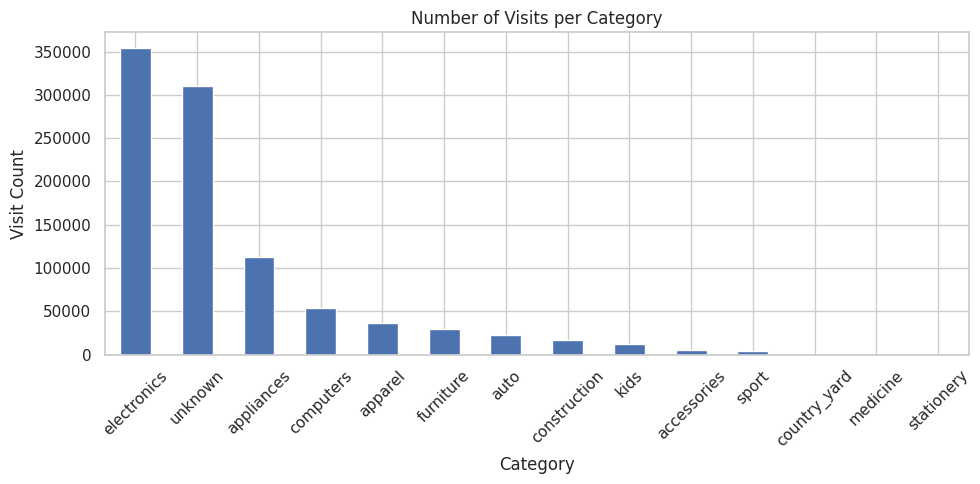

In [ ]:
visit_counts = df_original[df_original['event_type'] == 'view']['category_main'].value_counts()

visit_counts.plot(kind='bar', figsize=(10, 5), title="Number of Visits per Category")
plt.xlabel("Category")
plt.ylabel("Visit Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


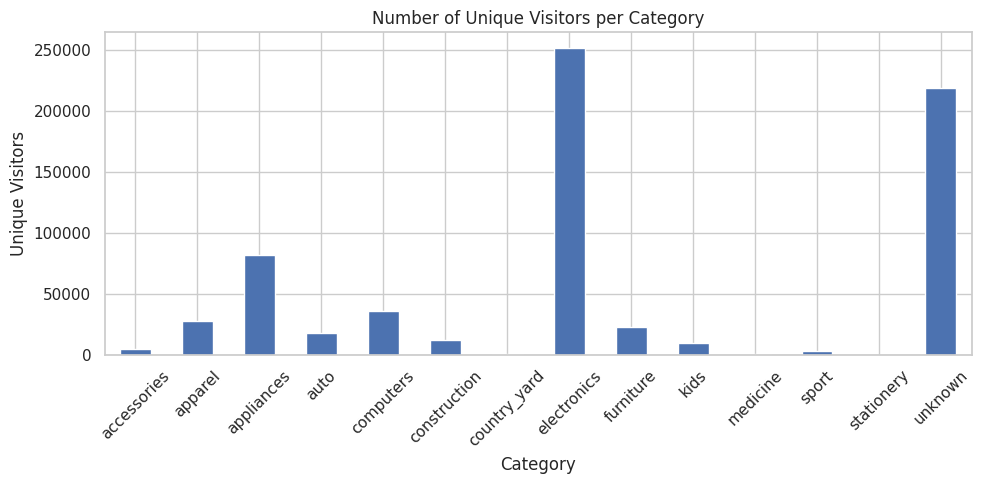

In [ ]:
visitor_counts = df_original[df_original['event_type'] == 'view'].groupby('category_main')['user_id'].nunique()

visitor_counts.plot(kind='bar', figsize=(10, 5), title="Number of Unique Visitors per Category")
plt.xlabel("Category")
plt.ylabel("Unique Visitors")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
subcategory_summary = df_original.groupby(['category_sub', 'event_type'])['user_id'].count().unstack().fillna(0)
subcategory_summary['total'] = subcategory_summary.sum(axis=1)
subcategory_summary = subcategory_summary.sort_values(by='total', ascending=False)
subcategory_summary.head(10)


event_type,cart,purchase,view,total
category_sub,,,,
smartphone,12930.0,7942.0,250403.0,271275.0
clocks,496.0,399.0,29973.0,30868.0
notebook,344.0,373.0,26368.0,27085.0
video.tv,818.0,478.0,24805.0,26101.0
audio.headphone,1184.0,662.0,24071.0,25917.0
kitchen.refrigerators,298.0,276.0,20391.0,20965.0
kitchen.washer,519.0,381.0,19431.0,20331.0
environment.vacuum,413.0,310.0,18048.0,18771.0
shoes,0.0,110.0,18060.0,18170.0


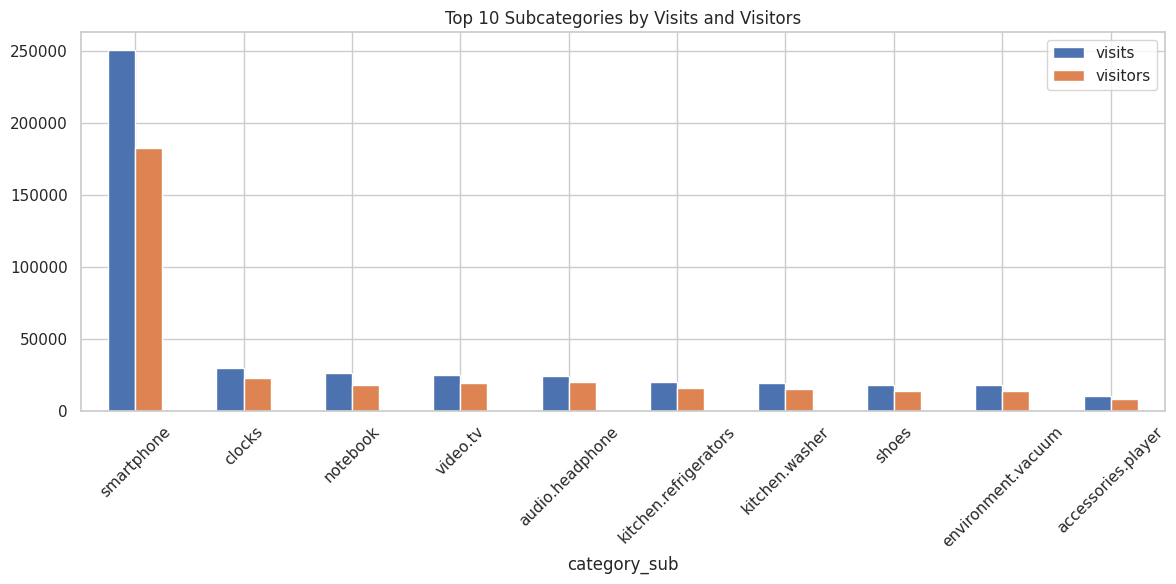

In [ ]:
top_subs = df_original[df_original['event_type'] == 'view'].groupby('category_sub') \
    .agg(visits=('user_id', 'count'), visitors=('user_id', 'nunique')) \
    .sort_values(by='visits', ascending=False).head(10)

top_subs.plot(kind='bar', figsize=(12, 6), title="Top 10 Subcategories by Visits and Visitors")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
cat_events = df_original.pivot_table(index='category_main', columns='event_type', values='user_id', aggfunc='count').fillna(0)
cat_events['view_to_cart_%'] = (cat_events['cart'] / cat_events['view']) * 100
cat_events['cart_to_purchase_%'] = (cat_events['purchase'] / cat_events['cart']) * 100
cat_events['view_to_purchase_%'] = (cat_events['purchase'] / cat_events['view']) * 100
cat_events[['view_to_cart_%', 'cart_to_purchase_%', 'view_to_purchase_%']].sort_values(by='view_to_purchase_%', ascending=False).head(10)


event_type,view_to_cart_%,cart_to_purchase_%,view_to_purchase_%
category_main,,,
electronics,4.464591,62.225874,2.778130
stationery,0.500000,400.000000,2.000000
medicine,4.559271,40.000000,1.823708
appliances,1.921156,83.939254,1.612604
unknown,0.786958,169.120654,1.330909
computers,1.130986,107.742998,1.218558
kids,0.470452,243.859649,1.147243
auto,0.893864,119.902913,1.071770
construction,1.522964,64.960630,0.989327


In [ ]:
subcat_events = df_original.pivot_table(index='category_sub', columns='event_type', values='user_id', aggfunc='count').fillna(0)
subcat_events['view_to_purchase_%'] = (subcat_events['purchase'] / subcat_events['view']) * 100
subcat_events = subcat_events.sort_values(by='view_to_purchase_%', ascending=False)
subcat_events.head(10)


event_type,cart,purchase,view,view_to_purchase_%
category_sub,,,,
fmcg.diapers,4.0,19.0,584.0,3.253425
smartphone,12930.0,7942.0,250403.0,3.171687
audio.headphone,1184.0,662.0,24071.0,2.750197
iron,93.0,91.0,3671.0,2.478889
ironing_board,11.0,19.0,803.0,2.366127
components.hdd,36.0,33.0,1479.0,2.231237
kitchen.toster,12.0,12.0,575.0,2.086957
tablet,216.0,141.0,7041.0,2.002556
cartrige,1.0,4.0,200.0,2.000000


In [ ]:
lowest_conv = subcat_events[subcat_events['view'] > 0].sort_values(by='view_to_purchase_%').head(10)
lowest_conv[['view', 'purchase', 'view_to_purchase_%']]


event_type,view,purchase,view_to_purchase_%
category_sub,,,
shoes.step_ins,34.0,0.0,0.0
shoes.slipons,126.0,0.0,0.0
shorts,12.0,0.0,0.0
tools.soldering,15.0,0.0,0.0
skirt,24.0,0.0,0.0
snowboard,87.0,0.0,0.0
accessories.anti_freeze,7.0,0.0,0.0
accessories.winch,206.0,0.0,0.0
environment.fan,55.0,0.0,0.0


In [ ]:
cat_turnover = df_original[df_original['event_type'] == 'purchase'].groupby('category_main')['price'].sum().reset_index()
cat_turnover = cat_turnover.sort_values(by='price', ascending=False)
cat_turnover.head()


,category_main,price
7,electronics,4150483.47
13,unknown,557632.99
2,appliances,341183.74
4,computers,260889.90
8,furniture,40227.58


In [ ]:
subcat_turnover = df_original[df_original['event_type'] == 'purchase'].groupby('category_sub')['price'].sum().reset_index()
subcat_turnover = subcat_turnover.sort_values(by='price', ascending=False)
subcat_turnover.head()


,category_sub,price
79,smartphone,3717156.03
66,notebook,210109.60
98,video.tv,179268.23
61,kitchen.washer,113794.84
22,clocks,109831.79


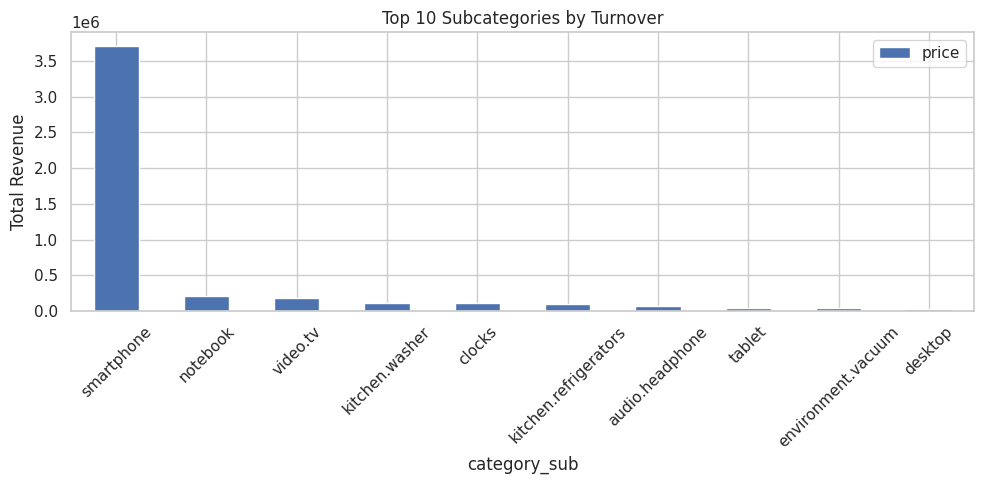

In [ ]:
top_sub_turnover = subcat_turnover.head(10)
top_sub_turnover.plot(kind='bar', x='category_sub', y='price', title="Top 10 Subcategories by Turnover", figsize=(10, 5))
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


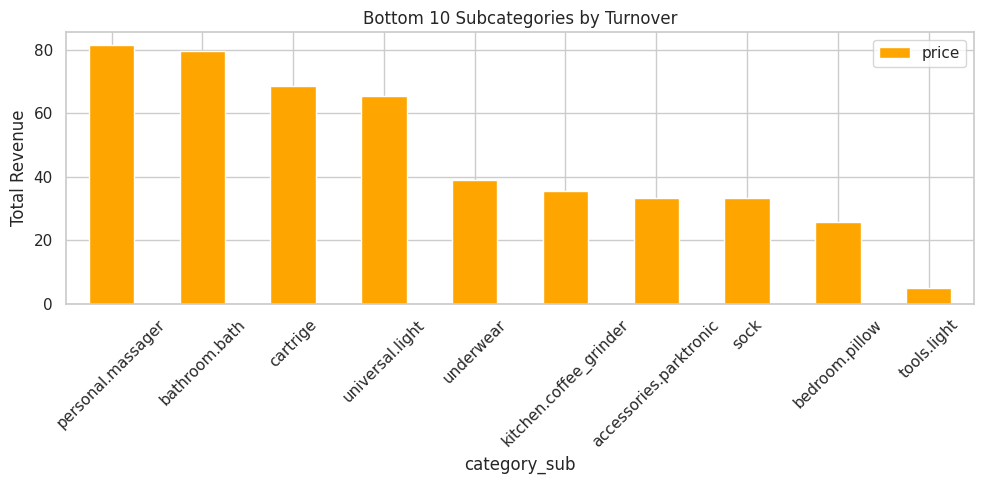

In [ ]:
bottom_sub_turnover = subcat_turnover.tail(10)
bottom_sub_turnover.plot(kind='bar', x='category_sub', y='price', title="Bottom 10 Subcategories by Turnover", figsize=(10, 5), color='orange')
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
repeat_customers = (
    df_original[df_original["event_type"] == "purchase"]
    .groupby("user_id")
    .size()
    .reset_index(name="purchase_count")
)
repeat_customers = repeat_customers[repeat_customers["purchase_count"] > 1]

print(f"Number of repeat customers: {len(repeat_customers)}")
repeat_customers.head()


Number of repeat customers: 872


,user_id,purchase_count
4,489085769,2
23,512368363,2
28,512371555,2
49,512382879,2
56,512384438,2


In [ ]:
# Total spend per user
customer_value = (
    df_original[df_original["event_type"] == "purchase"]
    .groupby("user_id")["price"]
    .sum()
    .reset_index(name="total_spent")
)

# Top 10% cutoff
threshold = customer_value["total_spent"].quantile(0.90)
top_customers = customer_value[customer_value["total_spent"] >= threshold]

print(f"Top 10% customers by spending: {len(top_customers)}")
top_customers.sort_values("total_spent", ascending=False).head()


Top 10% customers by spending: 1636


,user_id,total_spent
3159,515384420,8915.26
1115,513117637,8770.50
5173,519267944,6591.41
7527,530834332,5546.56
12140,553431815,5511.81


In [ ]:
print("📊 Numerical Summary:\n", df_original.describe())
print("\n🧩 Missing Values (%):\n", df_original.isnull().mean() * 100)


📊 Numerical Summary:
          product_id   category_id          price       user_id     event_hour  \
count  9.990320e+05  9.990320e+05  999032.000000  9.990320e+05  999032.000000   
mean   1.054697e+07  2.057399e+18     290.096491  5.335362e+08      11.215039   
std    1.188667e+07  1.841129e+16     358.026174  1.853218e+07       5.294446   
min    1.000978e+06  2.053014e+18       0.000000  2.105073e+08       0.000000   
25%    1.005157e+06  2.053014e+18      66.150000  5.159062e+08       7.000000   
50%    5.000344e+06  2.053014e+18     162.170000  5.296948e+08      11.000000   
75%    1.600034e+07  2.053014e+18     358.570000  5.516174e+08      16.000000   
max    6.050001e+07  2.175420e+18    2574.070000  5.662808e+08      23.000000   

           event_day  event_month  
count  999032.000000     999032.0  
mean       16.050580         10.0  
std         8.664753          0.0  
min         1.000000         10.0  
25%         9.000000         10.0  
50%        16.000000         10.

In [ ]:
summary = (
    df_original
    .groupby(["category_main", "event_type"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)
summary.head()


event_type,category_main,cart,purchase,view
0,accessories,8,35,5664
1,apparel,1,191,36242
2,appliances,2173,1824,113109
3,auto,206,247,23046
4,computers,607,654,53670


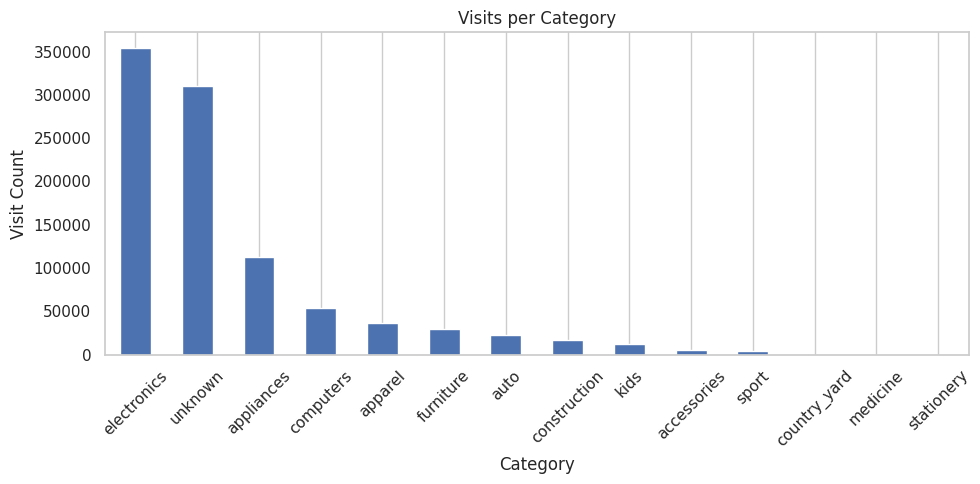

In [ ]:
import matplotlib.pyplot as plt

visits_by_category = df_original[df_original["event_type"] == "view"][
    "category_main"
].value_counts()

visits_by_category.plot(kind="bar", figsize=(10, 5), title="Visits per Category")
plt.ylabel("Visit Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Basic numerical + categorical summary
summary_stats = df_original.describe(include='all')
display(summary_stats)

# Count missing values
missing_values = df_original.isnull().sum()
missing_percentage = (missing_values / len(df_original)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing %": missing_percentage.round(2)
})

print("\n🔍 Missing Value Summary:")
display(missing_df.sort_values("Missing %", ascending=False))


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,event_day,event_weekday,event_month,event_date,main_category,sub_category,category_main,category_sub
count,999032,999032,9.990320e+05,9.990320e+05,999032,999032,999032.000000,9.990320e+05,999032,999032.000000,999032.000000,999032,999032.0,999032,999032,999032,999032,681762
unique,NaN,3,NaN,NaN,127,2774,NaN,NaN,873891,NaN,NaN,7,NaN,31,14,127,14,126
top,NaN,view,NaN,NaN,unknown,unknown,NaN,NaN,cfb90a35-9575-495c-b6aa-48ddca2a7a9c,NaN,NaN,Tuesday,NaN,2019-10-13,electronics,general,electronics,smartphone
freq,NaN,959891,NaN,NaN,317270,143842,NaN,NaN,29,NaN,NaN,160127,NaN,38647,380080,317270,380080,271275
mean,2019-10-16 12:55:46.916183808+00:00,NaN,1.054697e+07,2.057399e+18,NaN,NaN,290.096491,5.335362e+08,NaN,11.215039,16.050580,NaN,10.0,NaN,NaN,NaN,NaN,NaN
min,2019-10-01 00:01:09+00:00,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000,2.105073e+08,NaN,0.000000,1.000000,NaN,10.0,NaN,NaN,NaN,NaN,NaN
25%,2019-10-09 08:06:41+00:00,NaN,1.005157e+06,2.053014e+18,NaN,NaN,66.150000,5.159062e+08,NaN,7.000000,9.000000,NaN,10.0,NaN,NaN,NaN,NaN,NaN
50%,2019-10-16 12:02:34+00:00,NaN,5.000344e+06,2.053014e+18,NaN,NaN,162.170000,5.296948e+08,NaN,11.000000,16.000000,NaN,10.0,NaN,NaN,NaN,NaN,NaN
75%,2019-10-23 17:43:07+00:00,NaN,1.600034e+07,2.053014e+18,NaN,NaN,358.570000,5.516174e+08,NaN,16.000000,23.000000,NaN,10.0,NaN,NaN,NaN,NaN,NaN
max,2019-10-31 23:59:51+00:00,NaN,6.050001e+07,2.175420e+18,NaN,NaN,2574.070000,5.662808e+08,NaN,23.000000,31.000000,NaN,10.0,NaN,NaN,NaN,NaN,NaN



🔍 Missing Value Summary:


,Missing Values,Missing %
category_sub,317270,31.76
event_time,0,0.00
event_type,0,0.00
product_id,0,0.00
category_code,0,0.00
category_id,0,0.00
price,0,0.00
user_id,0,0.00
user_session,0,0.00
brand,0,0.00


In [ ]:
category_event_summary = (
    df_original.groupby(["category_main", "event_type"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

print("📊 Category-wise Event Summary:")
display(category_event_summary)


📊 Category-wise Event Summary:


event_type,category_main,cart,purchase,view
0,accessories,8,35,5664
1,apparel,1,191,36242
2,appliances,2173,1824,113109
3,auto,206,247,23046
4,computers,607,654,53670
5,construction,254,165,16678
6,country_yard,0,2,345
7,electronics,15823,9846,354411
8,furniture,60,200,29272
9,kids,57,139,12116


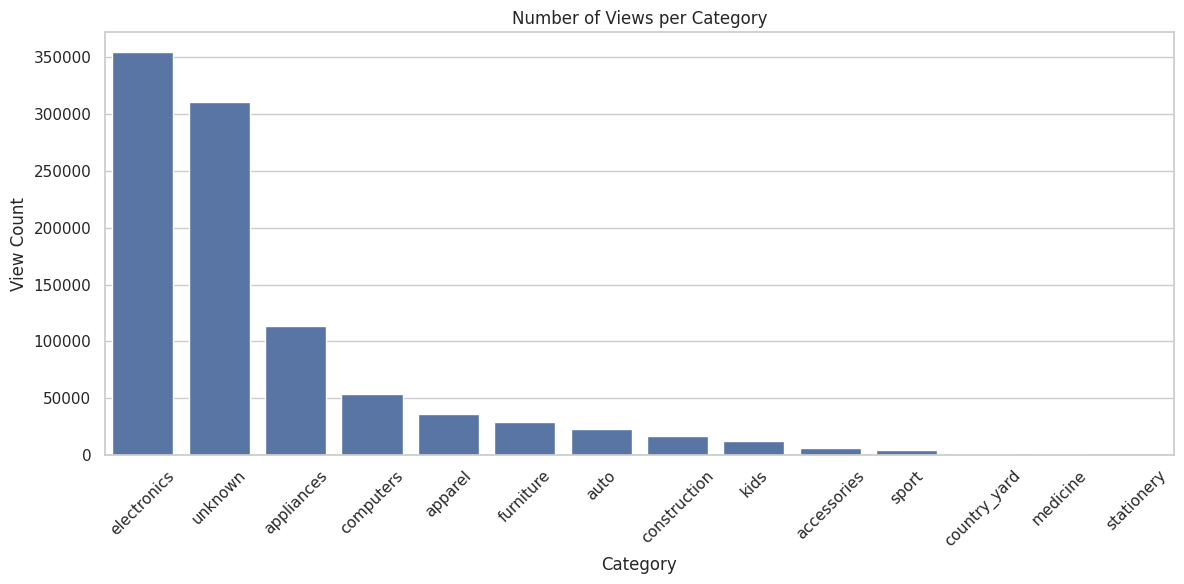

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

views_by_category = df_original[df_original["event_type"] == "view"]["category_main"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=views_by_category.index, y=views_by_category.values)
plt.xticks(rotation=45)
plt.title("Number of Views per Category")
plt.ylabel("View Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


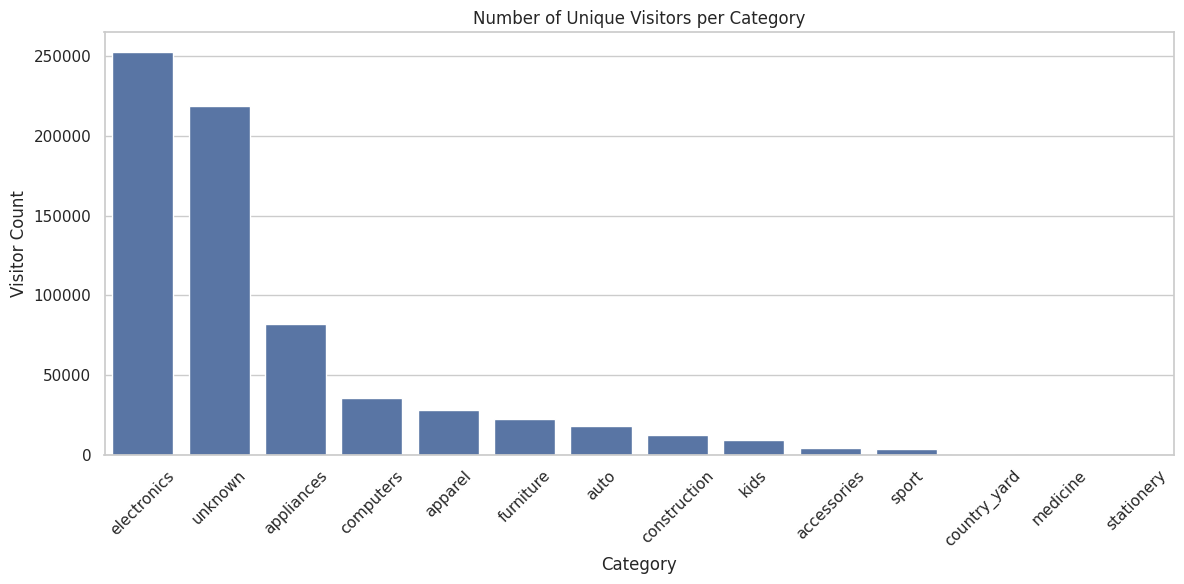

In [ ]:
unique_visitors = (
    df_original[df_original["event_type"] == "view"]
    .groupby("category_main")["user_id"]
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(x=unique_visitors.index, y=unique_visitors.values)
plt.xticks(rotation=45)
plt.title("Number of Unique Visitors per Category")
plt.ylabel("Visitor Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


In [ ]:
subcategory_summary = (
    df_original.groupby(["category_sub", "event_type"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .sort_values("view", ascending=False)
)

print("📊 Subcategory Summary Table:")
display(subcategory_summary.head(10))


📊 Subcategory Summary Table:


event_type,category_sub,cart,purchase,view
100,smartphone,12930,7942,250403
25,clocks,496,399,29973
76,notebook,344,373,26368
124,video.tv,818,478,24805
9,audio.headphone,1184,662,24071
67,kitchen.refrigerators,298,276,20391
71,kitchen.washer,519,381,19431
88,shoes,0,110,18060
43,environment.vacuum,413,310,18048
4,accessories.player,27,108,10715


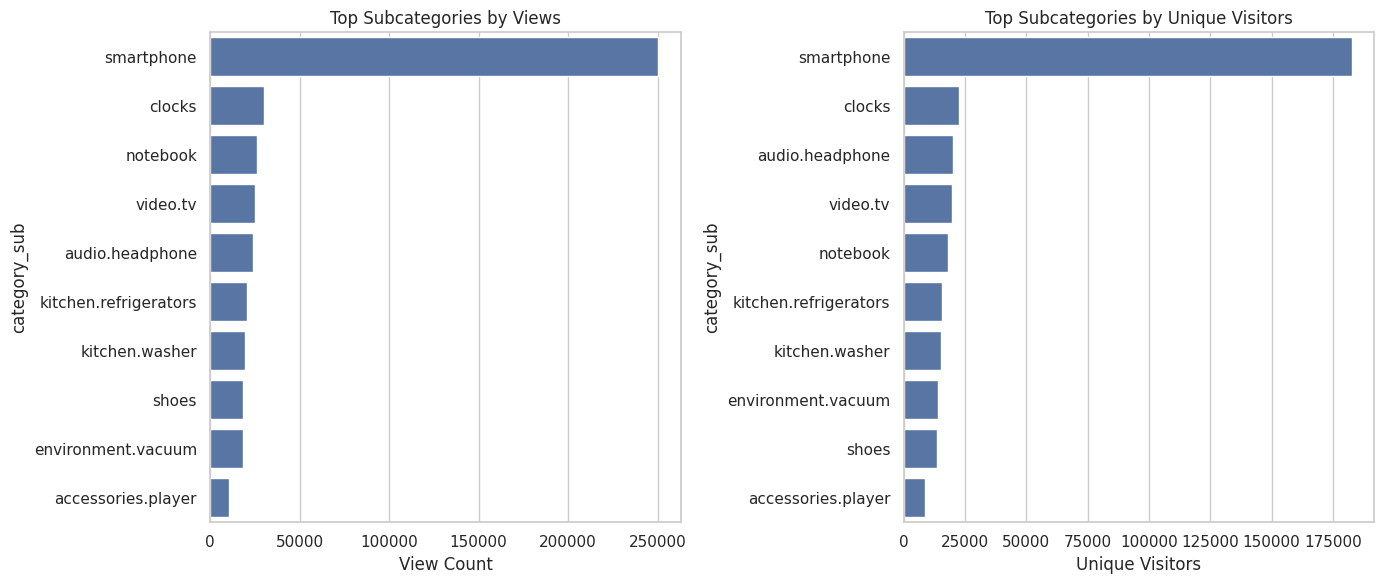

In [ ]:
# Top subcategories by view count
top_sub_view = (
    df_original[df_original["event_type"] == "view"]
    .groupby("category_sub")["user_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Top subcategories by unique visitors
top_sub_visitors = (
    df_original[df_original["event_type"] == "view"]
    .groupby("category_sub")["user_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(x=top_sub_view.values, y=top_sub_view.index)
plt.title("Top Subcategories by Views")
plt.xlabel("View Count")

plt.subplot(1,2,2)
sns.barplot(x=top_sub_visitors.values, y=top_sub_visitors.index)
plt.title("Top Subcategories by Unique Visitors")
plt.xlabel("Unique Visitors")

plt.tight_layout()
plt.show()


In [ ]:
conversion_df = df_original.pivot_table(
    index='category_main',
    columns='event_type',
    values='user_id',
    aggfunc='count',
    fill_value=0
).reset_index()

# Conversion rates
conversion_df['view_to_cart_%'] = (conversion_df['cart'] / conversion_df['view']) * 100
conversion_df['cart_to_purchase_%'] = (conversion_df['purchase'] / conversion_df['cart']) * 100
conversion_df['view_to_purchase_%'] = (conversion_df['purchase'] / conversion_df['view']) * 100

# Display
conversion_df = conversion_df.sort_values("view_to_purchase_%", ascending=False)
print("📈 Conversion Rates by Category:")
display(conversion_df)


📈 Conversion Rates by Category:


event_type,category_main,cart,purchase,view,view_to_cart_%,cart_to_purchase_%,view_to_purchase_%
7,electronics,15823,9846,354411,4.464591,6.222587e+01,2.778130
12,stationery,1,4,200,0.500000,4.000000e+02,2.000000
10,medicine,15,6,329,4.559271,4.000000e+01,1.823708
2,appliances,2173,1824,113109,1.921156,8.393925e+01,1.612604
13,unknown,2445,4135,310690,0.786958,1.691207e+02,1.330909
4,computers,607,654,53670,1.130986,1.077430e+02,1.218558
9,kids,57,139,12116,0.470452,2.438596e+02,1.147243
3,auto,206,247,23046,0.893864,1.199029e+02,1.071770
5,construction,254,165,16678,1.522964,6.496063e+01,0.989327
8,furniture,60,200,29272,0.204974,3.333333e+02,0.683247


In [ ]:
# Pivot table for subcategory-level events
sub_conv_df = df_original.pivot_table(
    index='category_sub',
    columns='event_type',
    values='user_id',
    aggfunc='count',
    fill_value=0
).reset_index()

# Calculate conversion rates
sub_conv_df['view_to_cart_%'] = (sub_conv_df['cart'] / sub_conv_df['view']) * 100
sub_conv_df['cart_to_purchase_%'] = (sub_conv_df['purchase'] / sub_conv_df['cart']) * 100
sub_conv_df['view_to_purchase_%'] = (sub_conv_df['purchase'] / sub_conv_df['view']) * 100

# Drop rows where views are 0 to avoid division errors
sub_conv_df = sub_conv_df[sub_conv_df['view'] > 0]

# Top 10
top_sub_conv = sub_conv_df.sort_values("view_to_purchase_%", ascending=False).head(10)

# Bottom 10
bottom_sub_conv = sub_conv_df.sort_values("view_to_purchase_%", ascending=True).head(10)

print("🔝 Top 10 Subcategories by View-to-Purchase Conversion:")
display(top_sub_conv[['category_sub', 'view_to_purchase_%']])

print("\n🔻 Bottom 10 Subcategories by View-to-Purchase Conversion:")
display(bottom_sub_conv[['category_sub', 'view_to_purchase_%']])


🔝 Top 10 Subcategories by View-to-Purchase Conversion:


event_type,category_sub,view_to_purchase_%
45,fmcg.diapers,3.253425
100,smartphone,3.171687
9,audio.headphone,2.750197
48,iron,2.478889
49,ironing_board,2.366127
29,components.hdd,2.231237
70,kitchen.toster,2.086957
104,tablet,2.002556
24,cartrige,2.000000
81,peripherals.printer,1.967908



🔻 Bottom 10 Subcategories by View-to-Purchase Conversion:


event_type,category_sub,view_to_purchase_%
1,accessories.anti_freeze,0.0
7,accessories.winch,0.0
19,belt,0.0
46,furniture.bench,0.0
42,environment.fan,0.0
47,furniture.hammok,0.0
38,dress,0.0
35,cultivator,0.0
50,jacket,0.0
52,jumper,0.0


In [ ]:
category_turnover = (
    df_original[df_original["event_type"] == "purchase"]
    .groupby("category_main")["price"]
    .sum()
    .reset_index()
    .rename(columns={"price": "total_turnover"})
    .sort_values("total_turnover", ascending=False)
)

print("💸 Turnover by Category:")
display(category_turnover)


💸 Turnover by Category:


,category_main,total_turnover
7,electronics,4150483.47
13,unknown,557632.99
2,appliances,341183.74
4,computers,260889.90
8,furniture,40227.58
3,auto,27974.53
5,construction,16927.64
9,kids,15435.30
1,apparel,15196.29
11,sport,5514.29


In [ ]:
subcategory_turnover = (
    df_original[df_original["event_type"] == "purchase"]
    .groupby("category_sub")["price"]
    .sum()
    .reset_index()
    .rename(columns={"price": "total_turnover"})
    .sort_values("total_turnover", ascending=False)
)

print("💰 Turnover by Subcategory:")
display(subcategory_turnover)


💰 Turnover by Subcategory:


,category_sub,total_turnover
79,smartphone,3717156.03
66,notebook,210109.60
98,video.tv,179268.23
61,kitchen.washer,113794.84
22,clocks,109831.79
...,...,...
45,kitchen.coffee_grinder,35.50
2,accessories.parktronic,33.44
80,sock,33.20
16,bedroom.pillow,25.74


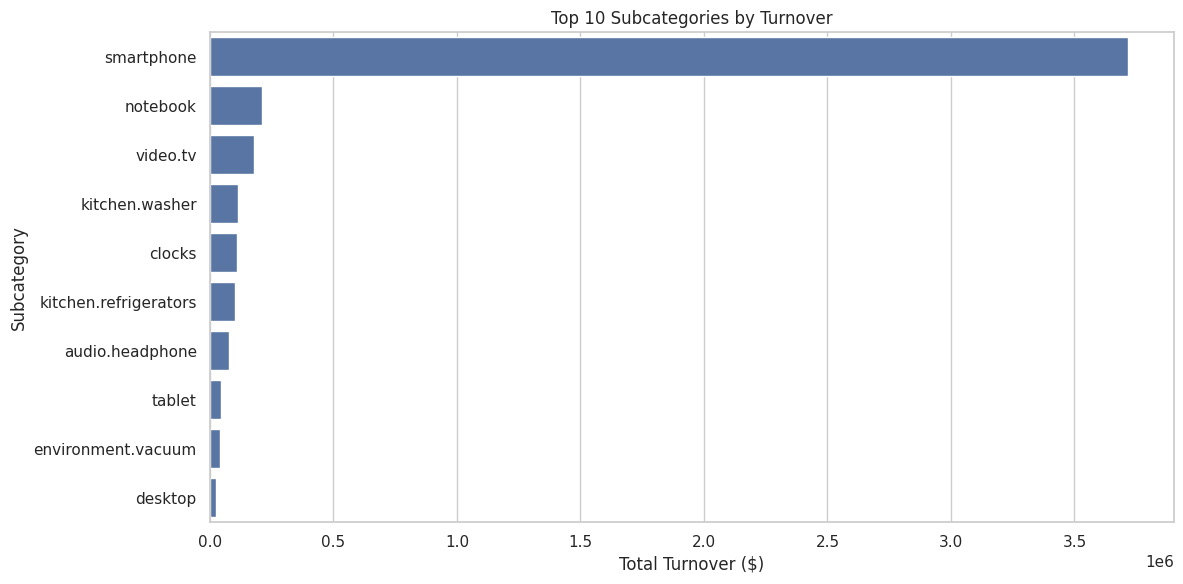

In [ ]:
top_turnover = subcategory_turnover.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="total_turnover", y="category_sub", data=top_turnover)
plt.title("Top 10 Subcategories by Turnover")
plt.xlabel("Total Turnover ($)")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()


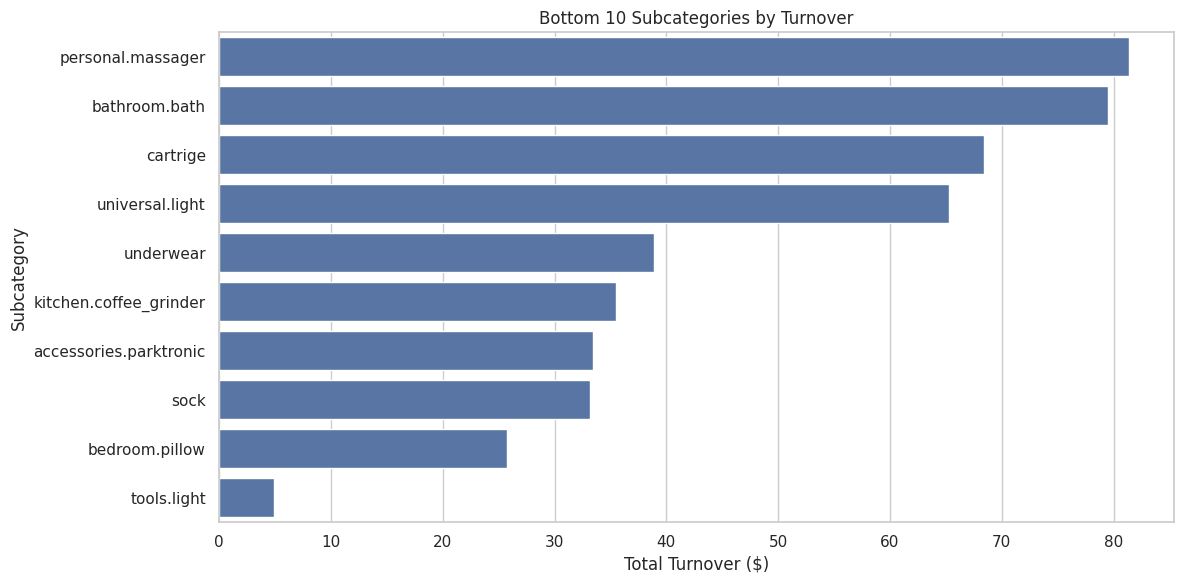

In [ ]:
bottom_turnover = subcategory_turnover.tail(10)

plt.figure(figsize=(12,6))
sns.barplot(x="total_turnover", y="category_sub", data=bottom_turnover)
plt.title("Bottom 10 Subcategories by Turnover")
plt.xlabel("Total Turnover ($)")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()


/tmp/ipython-input-75-3123654624.py:28: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


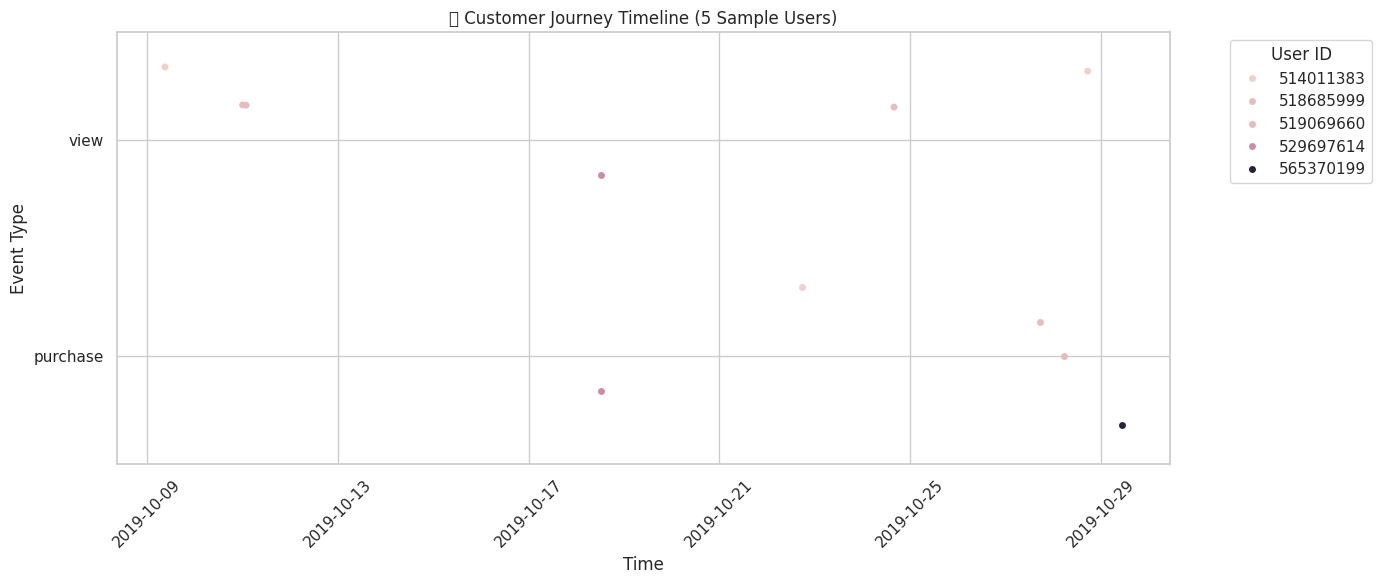

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filter: pick 5 random users who have at least one purchase
users_with_purchase = df[df['event_type'] == 'purchase']['user_id'].dropna().unique()
selected_users = np.random.choice(users_with_purchase, size=5, replace=False)

# Subset data for these users
journey_df = df[df['user_id'].isin(selected_users)].copy()

# Sort for readability
journey_df = journey_df.sort_values(by=['user_id', 'event_time'])

# Plot: cleaner strip plot
plt.figure(figsize=(14, 6))
sns.stripplot(data=journey_df, x='event_time', y='event_type', hue='user_id', jitter=True, dodge=True)

plt.title('🧭 Customer Journey Timeline (5 Sample Users)')
plt.xlabel('Time')
plt.ylabel('Event Type')
plt.xticks(rotation=45)
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-76-2651885889.py:18: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


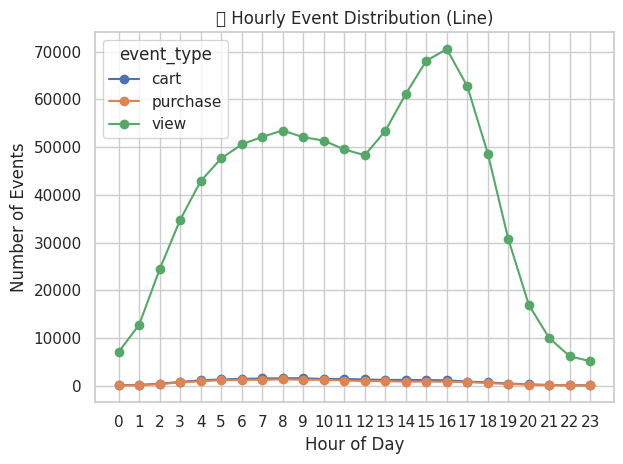

/tmp/ipython-input-76-2651885889.py:27: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


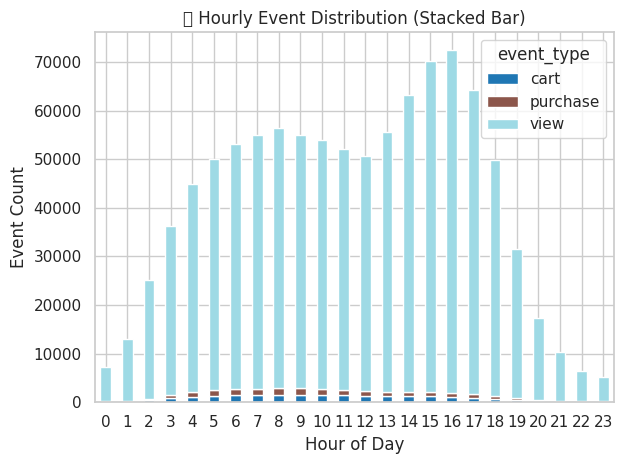

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure datetime format & extract hour
df['event_time'] = pd.to_datetime(df['event_time'])
df['event_hour'] = df['event_time'].dt.hour

# Step 2: Group by hour and event type
hourly_events = df.groupby('event_hour')['event_type'].value_counts().unstack().fillna(0)

# Step 3: Plot Line Chart
plt.figure(figsize=(12, 6))
hourly_events.plot(kind='line', title='⏰ Hourly Event Distribution (Line)', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Step 4: Plot Stacked Bar Chart (Optional Enhancement)
plt.figure(figsize=(14, 6))
hourly_events.plot(kind='bar', stacked=True, title='⏰ Hourly Event Distribution (Stacked Bar)', colormap='tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Event Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


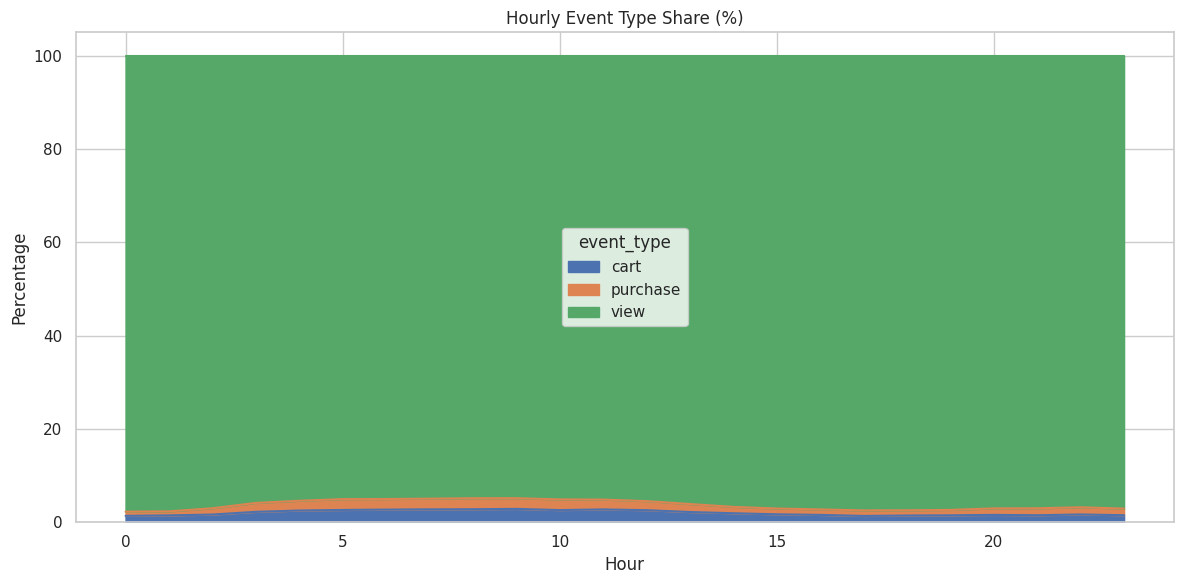

In [ ]:
hourly_percent = hourly_events.div(hourly_events.sum(axis=1), axis=0) * 100
hourly_percent.plot(kind='area', stacked=True, figsize=(12,6), title='Hourly Event Type Share (%)')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


/tmp/ipython-input-78-4263323607.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


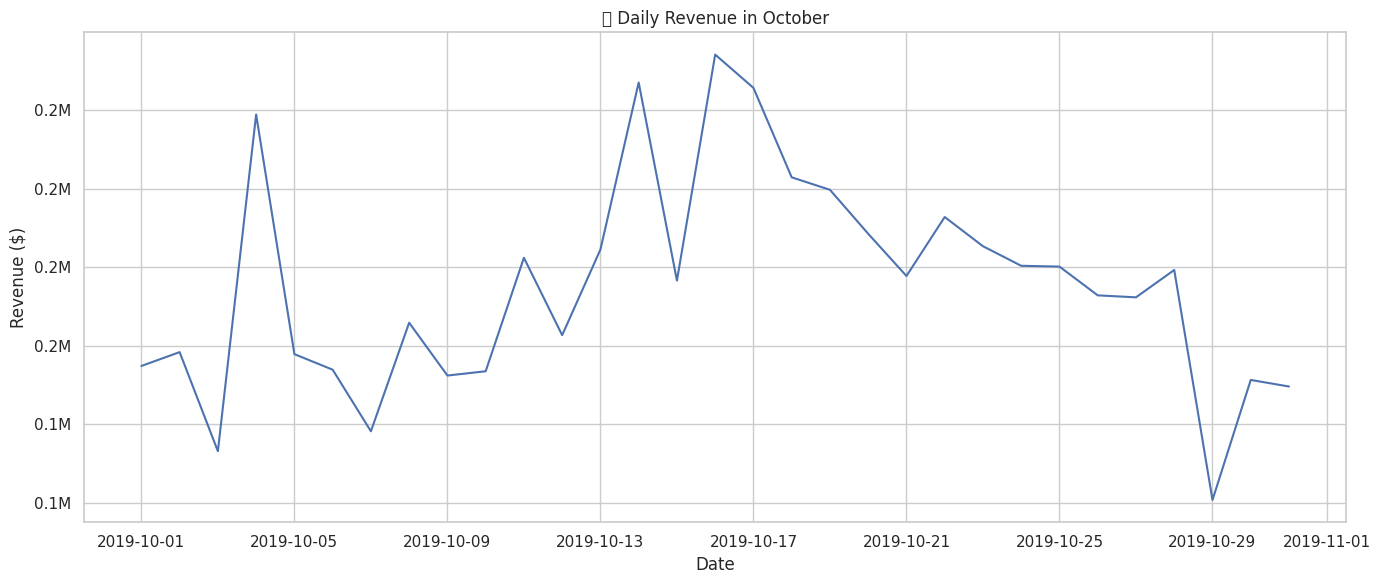

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Group revenue by date
daily_revenue = df[df['event_type'] == 'purchase'].groupby(df['event_time'].dt.date)['price'].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('📈 Daily Revenue in October')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')

# Fix y-axis to show millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Convert event_time to datetime if not already done
df['event_time'] = pd.to_datetime(df['event_time'])

# Filter only purchase events
purchase_df = df[df['event_type'] == 'purchase'].copy()

# Create a new column for purchase date (not datetime)
purchase_df['purchase_date'] = purchase_df['event_time'].dt.date

# Group by user and date, then count unique product_ids
basket_size = purchase_df.groupby(['user_id', 'purchase_date'])['product_id'].count()

# Display average basket size
print("🛒 Average Basket Size (products per purchase session):", round(basket_size.mean(), 2))


🛒 Average Basket Size (products per purchase session): 1.02


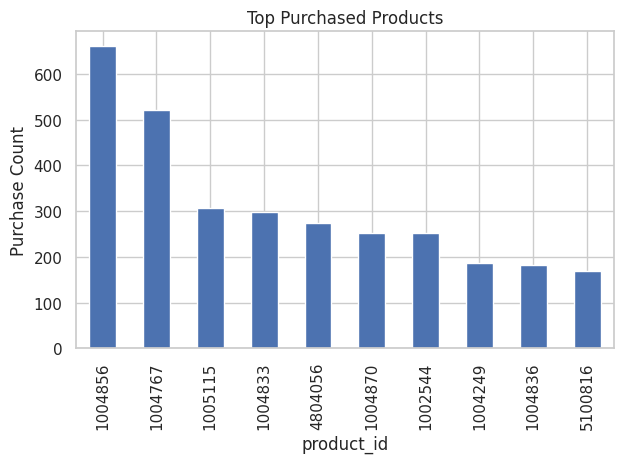

In [ ]:
top_products = df[df['event_type'] == 'purchase']['product_id'].value_counts().head(10)
top_products.plot(kind='bar', title='Top Purchased Products')
plt.ylabel('Purchase Count')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate basket size
df['order_date'] = df['event_time'].dt.date
basket_size = df[df['event_type'] == 'purchase'].groupby(['user_id', 'order_date'])['product_id'].count()
print("🛒 Average Basket Size:", round(basket_size.mean(), 2))


🛒 Average Basket Size: 1.02


In [ ]:
# Revenue per user
user_revenue = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum()
threshold = user_revenue.quantile(0.90)
top_customers = user_revenue[user_revenue >= threshold]
print("👑 Top 10% Customers:\n", top_customers.sort_values(ascending=False).head(10))


👑 Top 10% Customers:
 user_id
515384420    8915.26
513117637    8770.50
519267944    6591.41
530834332    5546.56
553431815    5511.81
512786896    5127.62
514320330    4983.60
513677580    4693.91
538216048    4523.57
545563258    4498.15
Name: price, dtype: float64


In [ ]:
repeat_customers = df[df['event_type'] == 'purchase'].groupby('user_id')['event_time'].count()
repeat_customers = repeat_customers[repeat_customers > 1]
print("🔁 Number of Repeat Customers:", repeat_customers.nunique())


🔁 Number of Repeat Customers: 7


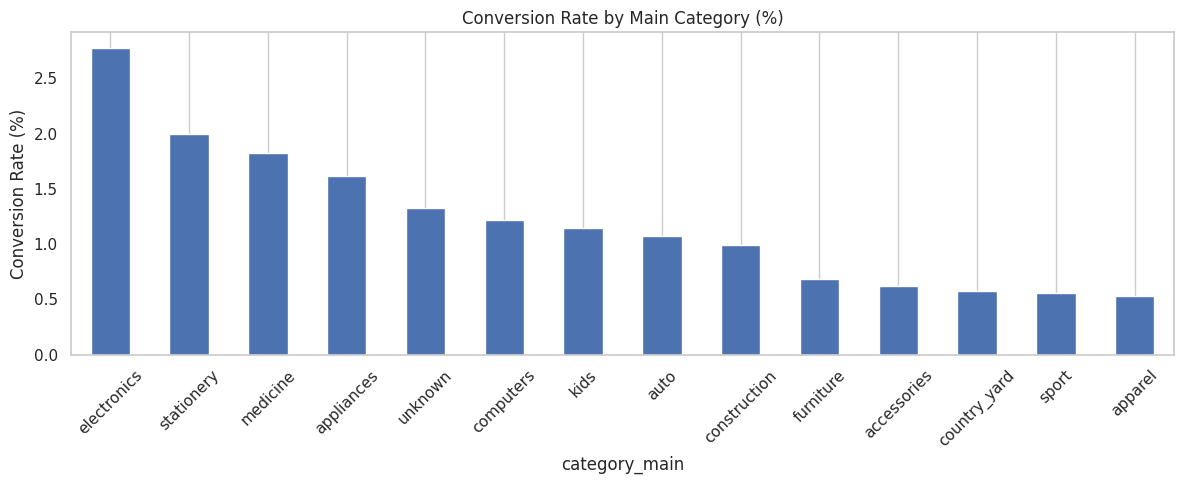

In [ ]:
# Ensure category_code exists and fill missing
df['category_code'] = df['category_code'].fillna('unknown')

# Create category_main and category_sub again
df[['category_main', 'category_sub']] = df['category_code'].str.split('.', n=1, expand=True)

# Group by category_main and event_type to calculate conversion
cat_summary = df.groupby(['category_main', 'event_type'])['user_id'].count().unstack().fillna(0)

# Calculate conversion rate (views to purchases)
cat_summary['conversion_rate'] = (cat_summary['purchase'] / cat_summary['view']) * 100

# Plot
cat_summary['conversion_rate'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,5),
    title='Conversion Rate by Main Category (%)'
)
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


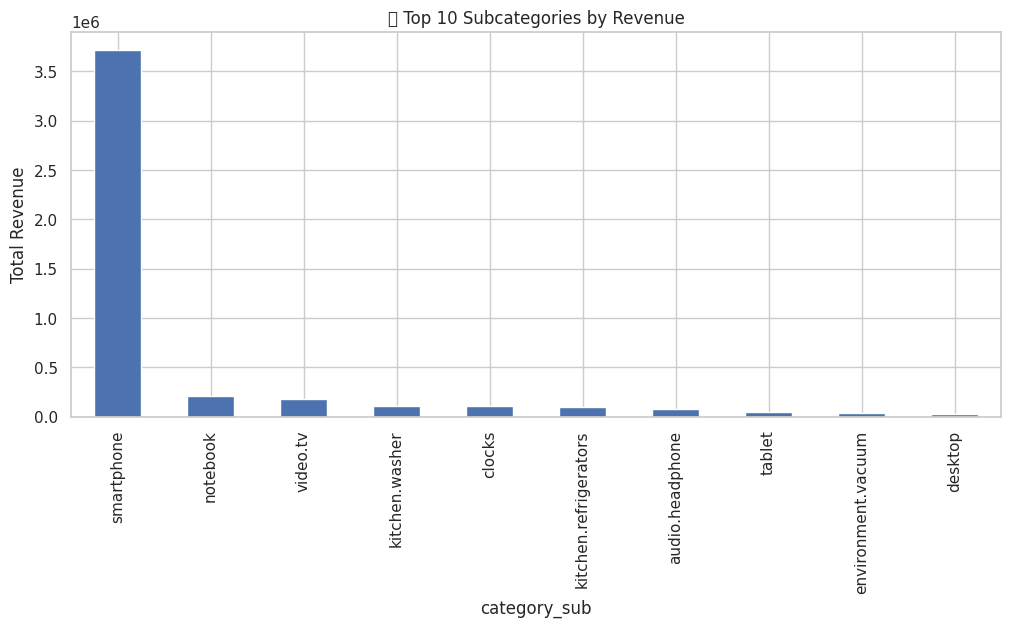

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


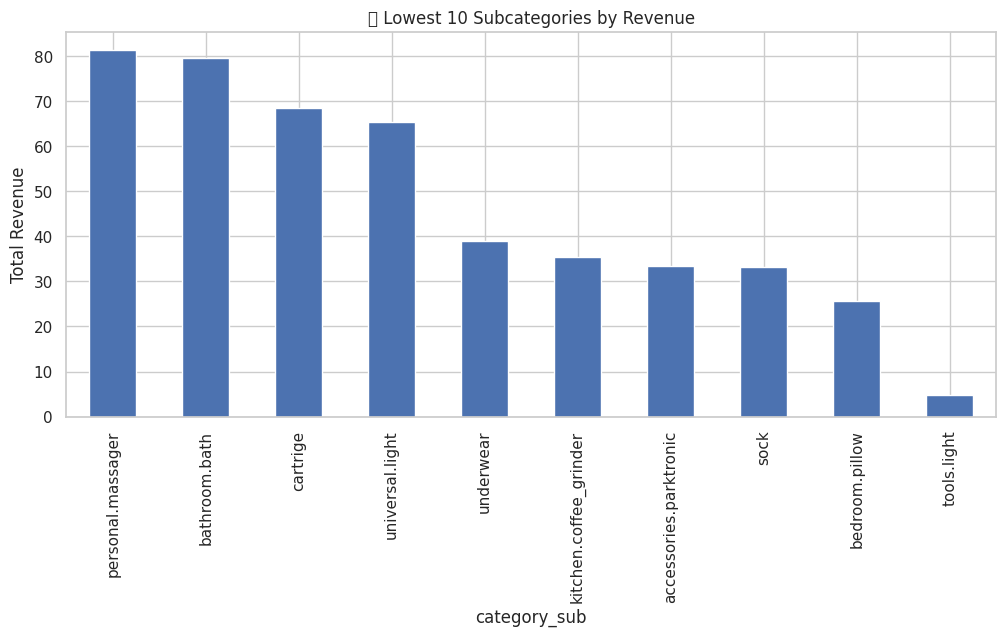

In [ ]:
subcategory_turnover = df[df['event_type'] == 'purchase'].groupby('category_sub')['price'].sum().sort_values(ascending=False)

# Top 10 highest turnover
subcategory_turnover.head(10).plot(kind='bar', title='💰 Top 10 Subcategories by Revenue', figsize=(12,5))
plt.ylabel('Total Revenue')
plt.show()

# Top 10 lowest turnover
subcategory_turnover.tail(10).plot(kind='bar', title='💸 Lowest 10 Subcategories by Revenue', figsize=(12,5))
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
activity_corr = df.groupby('category_main')['event_type'].value_counts().unstack().fillna(0)
correlation = activity_corr.corr()
print("📈 Correlation Between Event Types:\n", correlation)


📈 Correlation Between Event Types:
 event_type      cart  purchase      view
event_type                              
cart        1.000000  0.967910  0.818321
purchase    0.967910  1.000000  0.935765
view        0.818321  0.935765  1.000000


In [ ]:
# Step 1: Count events per user
user_events = oct_sample_df.groupby(['user_id', 'event_type']).size().unstack(fill_value=0).reset_index()

# Fill missing columns if user never had an event type
for col in ['view', 'cart', 'purchase']:
    if col not in user_events.columns:
        user_events[col] = 0

# Step 2: Define multi-class churn label
def classify_user(row):
    if row['purchase'] > 0:
        return 2  # Buyer
    elif row['cart'] > 0:
        return 1  # Cart abandoner
    else:
        return 0  # Browser only

user_events['churn_label'] = user_events.apply(classify_user, axis=1)

# Step 3: Preview
user_events[['user_id', 'view', 'cart', 'purchase', 'churn_label']].head()


event_type,user_id,view,cart,purchase,churn_label
0,210507313,1,0,0,0
1,216064734,1,0,0,0
2,221480173,1,0,0,0
3,239876607,1,0,0,0
4,240522111,1,0,0,0


In [ ]:
user_events['churn_label'].value_counts(normalize=True) * 100


,proportion
churn_label,
0,94.198936
1,3.092896
2,2.708168


In [ ]:
# Group all events by user and aggregate useful features
user_features = oct_sample_df.groupby('user_id').agg({
    'event_type': lambda x: x.tolist(),                        # collect event types
    'price': ['mean', 'max'],                                  # avg and max price
    'category_code': pd.Series.nunique,                        # number of unique categories
    'brand': pd.Series.nunique,                                # number of unique brands
    'event_date': pd.Series.nunique,                           # active days
})

# Rename columns
user_features.columns = [
    'events_list',
    'avg_price',
    'max_price',
    'num_categories',
    'num_brands',
    'active_days'
]

# Extract event counts from events_list
user_features['view_count'] = user_features['events_list'].apply(lambda x: x.count('view'))
user_features['cart_count'] = user_features['events_list'].apply(lambda x: x.count('cart'))
user_features['purchase_count'] = user_features['events_list'].apply(lambda x: x.count('purchase'))

# Drop the raw list column now
user_features.drop('events_list', axis=1, inplace=True)

# Reset index to keep user_id as column
user_features.reset_index(inplace=True)

# Preview
user_features.head()


,user_id,avg_price,max_price,num_categories,num_brands,active_days,view_count,cart_count,purchase_count
0,210507313,151.84,151.84,1,1,1,1,0,0
1,216064734,818.48,818.48,1,1,1,1,0,0
2,221480173,15.19,15.19,1,1,1,1,0,0
3,239876607,153.88,153.88,1,1,1,1,0,0
4,240522111,457.67,457.67,1,1,1,1,0,0


In [ ]:
# Merge features with churn labels
final_df = pd.merge(user_features, user_events[['user_id', 'churn_label']], on='user_id')

# Check final shape and preview
print("Final modeling dataset shape:", final_df.shape)
final_df.head()


Final modeling dataset shape: (603803, 10)


,user_id,avg_price,max_price,num_categories,num_brands,active_days,view_count,cart_count,purchase_count,churn_label
0,210507313,151.84,151.84,1,1,1,1,0,0,0
1,216064734,818.48,818.48,1,1,1,1,0,0,0
2,221480173,15.19,15.19,1,1,1,1,0,0,0
3,239876607,153.88,153.88,1,1,1,1,0,0,0
4,240522111,457.67,457.67,1,1,1,1,0,0,0


In [ ]:
final_df.fillna(0, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Drop identifiers and target from features
X = final_df.drop(['user_id', 'churn_label'], axis=1)
y = final_df['churn_label']

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train label distribution:\n", y_train.value_counts(normalize=True) * 100)


X_train shape: (483042, 8)
y_train label distribution:
 churn_label
0    94.198848
1     3.092899
2     2.708253
Name: proportion, dtype: float64


In [ ]:
# Drop user_id for correlation analysis
df_corr_check = final_df.drop(['user_id'], axis=1)

# Optional: If churn_label is not the last column, move it to the end
churn_label = df_corr_check.pop('churn_label')
df_corr_check['churn_label'] = churn_label


In [ ]:
# Calculate correlation with churn_label
correlations = df_corr_check.corr()['churn_label'].sort_values(ascending=False)

# Display top correlated features
print("Top features most correlated with churn_label:\n")
print(correlations)


Top features most correlated with churn_label:

churn_label       1.000000
purchase_count    0.837323
cart_count        0.484599
active_days       0.120297
num_categories    0.072218
num_brands        0.072031
max_price         0.031149
avg_price         0.012494
view_count       -0.046002
Name: churn_label, dtype: float64


In [ ]:
# Keep only safe features for modeling
safe_features = ['avg_price', 'max_price', 'num_categories', 'num_brands', 'active_days']

X = final_df[safe_features]
y = final_df['churn_label']


In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train shape:", X_train.shape)


X_train shape: (483042, 5)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train with class_weight to handle imbalance
log_clf = LogisticRegression(max_iter=200, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
log_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_clf.predict(X_test)
print("🔍 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log, digits=3))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


🔍 Logistic Regression Report:

              precision    recall  f1-score   support

           0      0.955     0.739     0.833    113756
           1      0.036     0.109     0.054      3735
           2      0.055     0.363     0.096      3270

    accuracy                          0.709    120761
   macro avg      0.349     0.404     0.328    120761
weighted avg      0.903     0.709     0.789    120761



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install lightgbm --quiet


In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Initialize model
lgbm_clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,  # Number of churn classes
    class_weight='balanced',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)

# Train model
lgbm_clf.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 483042, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(class_weight='balanced', max_depth=7, num_class=3,
               objective='multiclass', random_state=42)

In [ ]:
# Predict
y_pred_lgb = lgbm_clf.predict(X_test)

# Classification report
print("\n🔍 LightGBM Classification Report:\n")
print(classification_report(y_test, y_pred_lgb, digits=3))



🔍 LightGBM Classification Report:

              precision    recall  f1-score   support

           0      0.968     0.606     0.746    113756
           1      0.054     0.448     0.096      3735
           2      0.052     0.294     0.089      3270

    accuracy                          0.593    120761
   macro avg      0.358     0.449     0.310    120761
weighted avg      0.915     0.593     0.708    120761



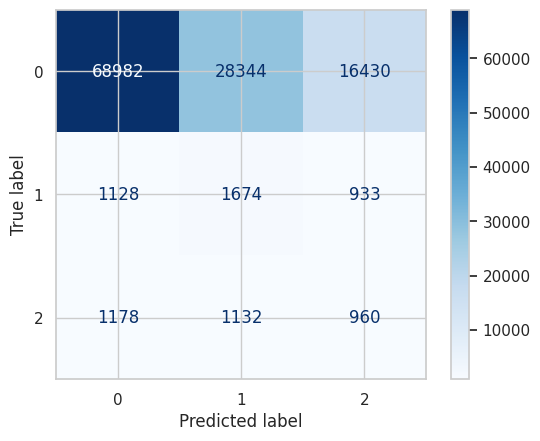

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')


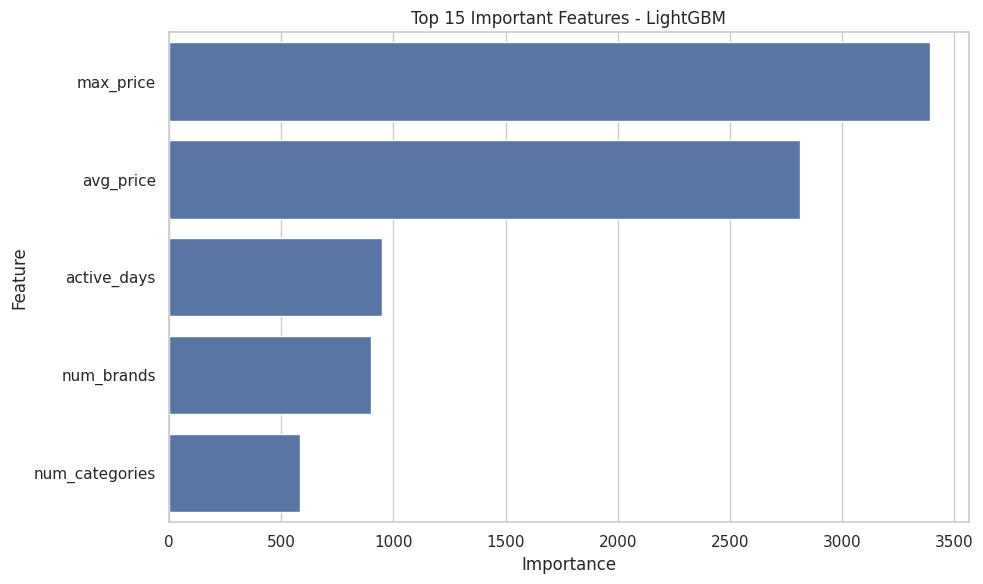

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances
feat_importance = lgbm_clf.feature_importances_
feat_names = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Top 15 Important Features - LightGBM')
plt.tight_layout()
plt.show()



📊 Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0      0.942     1.000     0.970    113756
           1      0.000     0.000     0.000      3735
           2      0.000     0.000     0.000      3270

    accuracy                          0.942    120761
   macro avg      0.314     0.333     0.323    120761
weighted avg      0.887     0.942     0.914    120761



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


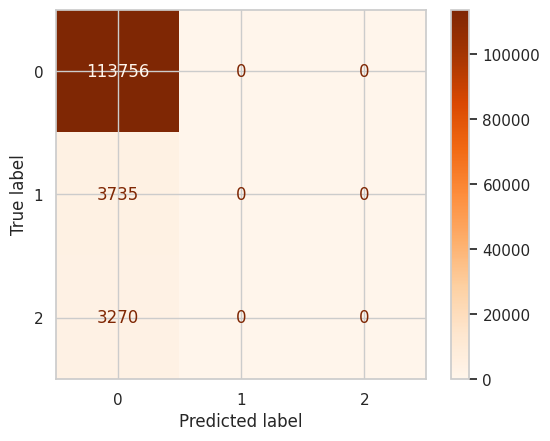

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Naive Bayes requires non-negative features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train)
X_test_nb = scaler.transform(X_test)

# Train model
nb_clf = MultinomialNB()
nb_clf.fit(X_train_nb, y_train)

# Predict
y_pred_nb = nb_clf.predict(X_test_nb)

# Evaluation
print("\n📊 Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb, digits=3))

cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Oranges', values_format='d')



📊 Linear SVC Classification Report:

              precision    recall  f1-score   support

           0      0.942     1.000     0.970    113756
           1      0.000     0.000     0.000      3735
           2      0.200     0.000     0.001      3270

    accuracy                          0.942    120761
   macro avg      0.381     0.333     0.324    120761
weighted avg      0.893     0.942     0.914    120761



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


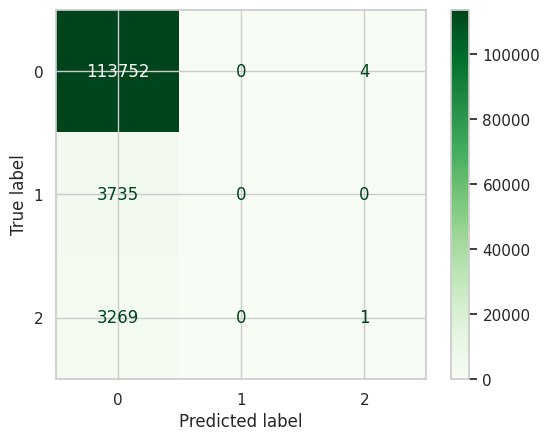

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

svc_clf = LinearSVC(max_iter=1000, random_state=42)
svc_clf.fit(X_train, y_train)

y_pred_svc = svc_clf.predict(X_test)

print("\n📊 Linear SVC Classification Report:\n")
print(classification_report(y_test, y_pred_svc, digits=3))

cm = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Greens', values_format='d')


In [ ]:
print(df.columns.tolist())


['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session', 'event_hour', 'event_day', 'event_weekday', 'event_month', 'event_date', 'main_category', 'sub_category', 'order_date', 'category_main', 'category_sub']


In [ ]:
# Convert event_time to datetime if not already
df['event_time'] = pd.to_datetime(df['event_time'])

# Create a new column 'event_day_only'
df['event_day_only'] = df['event_time'].dt.date

# Feature Engineering: User-level aggregation
user_df = df.groupby('user_id').agg({
    'price': ['mean', 'max'],
    'event_type': 'count',
    'main_category': pd.Series.nunique,
    'event_day_only': pd.Series.nunique
}).reset_index()

# Rename columns
user_df.columns = ['user_id', 'avg_price', 'max_price', 'total_events', 'unique_categories', 'active_days']

# Preview
user_df.head()


,user_id,avg_price,max_price,total_events,unique_categories,active_days
0,210507313,151.84,151.84,1,1,1
1,216064734,818.48,818.48,1,1,1
2,221480173,15.19,15.19,1,1,1
3,239876607,153.88,153.88,1,1,1
4,240522111,457.67,457.67,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

features = user_df[['avg_price', 'max_price', 'total_events', 'unique_categories', 'active_days']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


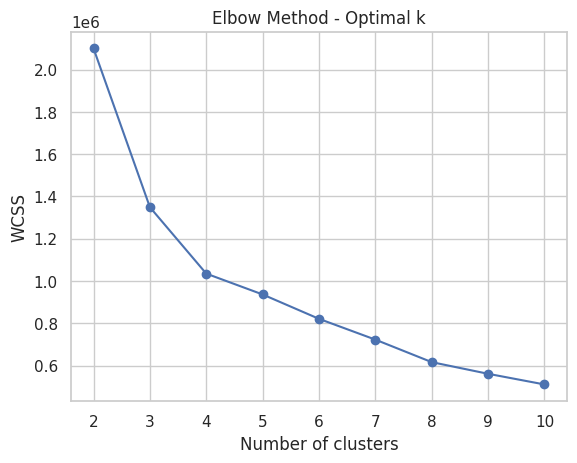

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
user_df['cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
# Calculate mean values of each cluster
cluster_summary = user_df.groupby('cluster')[['avg_price', 'max_price', 'total_events', 'unique_categories', 'active_days']].mean().round(2)

# Add customer count per cluster
cluster_summary['count'] = user_df['cluster'].value_counts().sort_index()

# Show the summary
print("📊 Cluster Profiles:\n")
print(cluster_summary)


📊 Cluster Profiles:

         avg_price  max_price  total_events  unique_categories  active_days  \
cluster                                                                       
0           182.86     191.36          1.22               1.00         1.08   
1          1042.07    1154.64          1.41               1.06         1.21   
2           280.70     713.13          8.80               2.71         5.43   
3           217.26     372.78          3.11               1.98         2.29   

          count  
cluster          
0        432722  
1         76927  
2         12233  
3         81921  


/tmp/ipython-input-125-2409529049.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


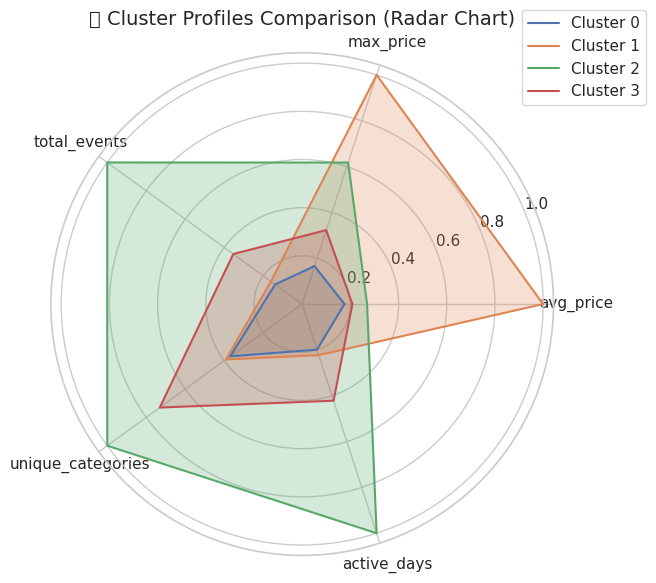

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for radar chart
features = ['avg_price', 'max_price', 'total_events', 'unique_categories', 'active_days']
labels = cluster_summary.index.astype(str)
data = cluster_summary[features].values

# Normalize the data between 0 and 1 for fair comparison
data_normalized = data / data.max(axis=0)

# Radar chart setup
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
data_normalized = np.concatenate((data_normalized, data_normalized[:, [0]]), axis=1)
angles += angles[:1]

# Create figure
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for i in range(len(data_normalized)):
    ax.plot(angles, data_normalized[i], label=f'Cluster {labels[i]}')
    ax.fill(angles, data_normalized[i], alpha=0.25)

# Feature labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_title("📊 Cluster Profiles Comparison (Radar Chart)", size=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Replace user_df with your actual cleaned dataset name used for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_df)  # ⬅️ Make sure this is the right DataFrame

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(scaled_data)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming X_pca is your PCA-transformed data
K_range = range(2, 11)  # Try from 2 to 10 clusters
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# 📈 Plotting the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()
